In [1]:
# Imports necessários 

import pandas as pd 
from sklearn import preprocessing
from scipy.spatial import distance_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#1 - Carregamento da Base de dados

In [9]:
crimes_dataset = pd.read_excel("indicadoressegurancapublicauf.xlsx")
crimes_dataset.head(9)

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0
5,Acre,Roubo de carga,2015,janeiro,0
6,Acre,Roubo de veículo,2015,janeiro,0
7,Acre,Roubo seguido de morte (latrocínio),2015,janeiro,0
8,Acre,Tentativa de homicídio,2015,janeiro,2


#2 - Pré-processamento dos dados


##2.1 Calculando quantidade de cada tipo de crime indivídualmente

In [20]:
#Acre
#estupro
estupro_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Acre')]
var_estupro_Acre = estupro_Acre['Ocorrências'].sum()
print('var_estupro_Acre:',var_estupro_Acre)
#furto de veículo
furto_de_veículo_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Acre')]
var_furto_de_veículo_Acre = furto_de_veículo_Acre['Ocorrências'].sum()
print('var_furto_de_veículo_Acre:',var_furto_de_veículo_Acre)
#homicídio doloso
homicídio_doloso_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Acre')]
var_homicídio_doloso_Acre = homicídio_doloso_Acre['Ocorrências'].sum()
print('var_Homicídio_doloso_Acre:',var_homicídio_doloso_Acre)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Acre')]
var_lesão_corporal_seguida_de_morte_Acre = lesão_corporal_seguida_de_morte_Acre['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Acre:',var_lesão_corporal_seguida_de_morte_Acre)
#roubo a instituição financeira
roubo_a_instituição_financeira_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Acre')]
var_roubo_a_instituição_financeira_Acre = roubo_a_instituição_financeira_Acre['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Acre:',var_roubo_a_instituição_financeira_Acre)
#roubo de carga
roubo_de_carga_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Acre')]
var_roubo_de_carga_Acre = roubo_de_carga_Acre['Ocorrências'].sum()
print('var_roubo_de_carga_Acre:',var_roubo_de_carga_Acre)
#roubo de veículo
roubo_de_veículo_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Acre')]
var_roubo_de_veículo_Acre = roubo_de_veículo_Acre['Ocorrências'].sum()
print('var_roubo_de_veículo_Acre:',var_roubo_de_veículo_Acre)
#Roubo seguido de morte (latrocínio)
latrocínio_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Acre')]
var_latrocínio_Acre = latrocínio_Acre['Ocorrências'].sum()
print('var_latrocínio_Acre:',var_latrocínio_Acre)
#Tentativa de homicídio	
tentativa_de_homicídio_Acre = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Acre')]
var_tentativa_de_homicídio_Acre = tentativa_de_homicídio_Acre['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Acre:',var_tentativa_de_homicídio_Acre)
#Total de crimes do Acre
crimes_Acre = [var_estupro_Acre,var_furto_de_veículo_Acre,var_homicídio_doloso_Acre,var_latrocínio_Acre,var_lesão_corporal_seguida_de_morte_Acre,var_roubo_a_instituição_financeira_Acre,var_roubo_de_carga_Acre,var_roubo_de_veículo_Acre,var_tentativa_de_homicídio_Acre]
total_crimes_Acre = sum(crimes_Acre)
print(total_crimes_Acre)

var_estupro_Acre: 1095
var_furto_de_veículo_Acre: 2159
var_furto_de_veículo_Acre: 1808
var_lesão_corporal_seguida_de_morte_Acre: 7
var_roubo_a_instituição_financeira_Acre: 12
var_roubo_de_carga_Acre: 8
var_roubo_de_veículo_Acre: 4110
var_latrocínio_Acre: 81
var_tentativa_de_homicídio_Acre: 479
9759


In [21]:
#Alagoas
#estupro
estupro_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Alagoas')]
var_estupro_Alagoas = estupro_Alagoas['Ocorrências'].sum()
print('var_estupro_Alagoas:',var_estupro_Alagoas)
#furto de veículo
furto_de_veículo_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Alagoas')]
var_furto_de_veículo_Alagoas = furto_de_veículo_Alagoas['Ocorrências'].sum()
print('var_furto_de_veículo_Alagoas:',var_furto_de_veículo_Alagoas)
#homicídio doloso
homicídio_doloso_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Alagoas')]
var_homicídio_doloso_Alagoas = homicídio_doloso_Alagoas['Ocorrências'].sum()
print('var_homicídio_doloso_Alagoas:',var_homicídio_doloso_Alagoas)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Alagoas')]
var_lesão_corporal_seguida_de_morte_Alagoas = lesão_corporal_seguida_de_morte_Alagoas['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Alagoas:',var_lesão_corporal_seguida_de_morte_Alagoas)
#roubo a instituição financeira
roubo_a_instituição_financeira_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Alagoas')]
var_roubo_a_instituição_financeira_Alagoas = roubo_a_instituição_financeira_Alagoas['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Alagoas:',var_roubo_a_instituição_financeira_Alagoas)
#roubo de carga
roubo_de_carga_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Alagoas')]
var_roubo_de_carga_Alagoas = roubo_de_carga_Alagoas['Ocorrências'].sum()
print('var_roubo_de_carga_Alagoas:',var_roubo_de_carga_Alagoas)
#roubo de veículo
roubo_de_veículo_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Alagoas')]
var_roubo_de_veículo_Alagoas = roubo_de_veículo_Alagoas['Ocorrências'].sum()
print('var_roubo_de_veículo_Alagoas:',var_roubo_de_veículo_Alagoas)
#Roubo seguido de morte (latrocínio)
latrocínio_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Alagoas')]
var_latrocínio_Alagoas = latrocínio_Alagoas['Ocorrências'].sum()
print('var_latrocínio_Alagoas:',var_latrocínio_Alagoas)
#Tentativa de homicídio	
tentativa_de_homicídio_Alagoas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Alagoas')]
var_tentativa_de_homicídio_Alagoas = tentativa_de_homicídio_Alagoas['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Alagoas:',var_tentativa_de_homicídio_Alagoas)
#Total de crimes do Acre
crimes_Alagoas = [var_estupro_Alagoas,var_furto_de_veículo_Alagoas,var_homicídio_doloso_Alagoas,var_latrocínio_Alagoas,var_lesão_corporal_seguida_de_morte_Alagoas,var_roubo_a_instituição_financeira_Alagoas,var_roubo_de_carga_Alagoas,var_roubo_de_veículo_Alagoas,var_tentativa_de_homicídio_Alagoas]
total_crimes_Alagoas = sum(crimes_Alagoas)
print(total_crimes_Alagoas)

var_estupro_Alagoas: 3582
var_furto_de_veículo_Alagoas: 6966
var_furto_de_veículo_Alagoas: 8606
var_lesão_corporal_seguida_de_morte_Alagoas: 61
var_roubo_a_instituição_financeira_Alagoas: 98
var_roubo_de_carga_Alagoas: 416
var_roubo_de_veículo_Alagoas: 17782
var_latrocínio_Alagoas: 253
var_tentativa_de_homicídio_Alagoas: 3263
41027


In [24]:
#Amapá
#estupro
estupro_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Amapá')]
var_estupro_Amapá = estupro_Amapá['Ocorrências'].sum()
print('var_estupro_Amapá:',var_estupro_Amapá)
#furto de veículo
furto_de_veículo_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Amapá')]
var_furto_de_veículo_Amapá = furto_de_veículo_Amapá['Ocorrências'].sum()
print('var_furto_de_veículo_Amapá:',var_furto_de_veículo_Amapá)
#homicídio doloso
homicídio_doloso_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Amapá')]
var_homicídio_doloso_Amapá = homicídio_doloso_Amapá['Ocorrências'].sum()
print('var_homicídio_doloso_Amapá:',var_homicídio_doloso_Amapá)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Amapá')]
var_lesão_corporal_seguida_de_morte_Amapá = lesão_corporal_seguida_de_morte_Amapá['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Amapá:',var_lesão_corporal_seguida_de_morte_Amapá)
#roubo a instituição financeira
roubo_a_instituição_financeira_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Amapá')]
var_roubo_a_instituição_financeira_Amapá = roubo_a_instituição_financeira_Amapá['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Amapá:',var_roubo_a_instituição_financeira_Amapá)
#roubo de carga
roubo_de_carga_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Amapá')]
var_roubo_de_carga_Amapá = roubo_de_carga_Amapá['Ocorrências'].sum()
print('var_roubo_de_carga_Amapá:',var_roubo_de_carga_Amapá)
#roubo de veículo
roubo_de_veículo_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Amapá')]
var_roubo_de_veículo_Amapá = roubo_de_veículo_Amapá['Ocorrências'].sum()
print('var_roubo_de_veículo_Amapá:',var_roubo_de_veículo_Amapá)
#Roubo seguido de morte (latrocínio)
latrocínio_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Amapá')]
var_latrocínio_Amapá = latrocínio_Amapá['Ocorrências'].sum()
print('var_latrocínio_Amapá:',var_latrocínio_Amapá)
#Tentativa de homicídio	
tentativa_de_homicídio_Amapá = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Amapá')]
var_tentativa_de_homicídio_Amapá = tentativa_de_homicídio_Amapá['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Amapá:',var_tentativa_de_homicídio_Amapá)
#Total de crimes do Amapá
crimes_Amapá = [var_estupro_Amapá,var_furto_de_veículo_Amapá,var_homicídio_doloso_Amapá,var_latrocínio_Amapá,var_lesão_corporal_seguida_de_morte_Amapá,var_roubo_a_instituição_financeira_Amapá,var_roubo_de_carga_Amapá,var_roubo_de_veículo_Amapá,var_tentativa_de_homicídio_Amapá]
total_crimes_Amapá = sum(crimes_Amapá)
print(total_crimes_Amapá)

var_estupro_Amapá: 2207
var_furto_de_veículo_Amapá: 3843
var_furto_de_veículo_Amapá: 1544
var_lesão_corporal_seguida_de_morte_Amapá: 101
var_roubo_a_instituição_financeira_Amapá: 49
var_roubo_de_carga_Amapá: 28
var_roubo_de_veículo_Amapá: 1906
var_latrocínio_Amapá: 119
var_tentativa_de_homicídio_Amapá: 1318
11115


In [26]:
#Amazonas
#estupro
estupro_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Amazonas')]
var_estupro_Amazonas = estupro_Amazonas['Ocorrências'].sum()
print('var_estupro_Amazonas:',var_estupro_Amazonas)
#furto de veículo
furto_de_veículo_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Amazonas')]
var_furto_de_veículo_Amazonas = furto_de_veículo_Amazonas['Ocorrências'].sum()
print('var_furto_de_veículo_Amazonas:',var_furto_de_veículo_Amazonas)
#homicídio doloso
homicídio_doloso_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Amazonas')]
var_homicídio_doloso_Amazonas = homicídio_doloso_Amazonas['Ocorrências'].sum()
print('var_homicídio_doloso_Amazonas:',var_homicídio_doloso_Amazonas)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Amazonas')]
var_lesão_corporal_seguida_de_morte_Amazonas = lesão_corporal_seguida_de_morte_Amazonas['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Amazonas:',var_lesão_corporal_seguida_de_morte_Amazonas)
#roubo a instituição financeira
roubo_a_instituição_financeira_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Amazonas')]
var_roubo_a_instituição_financeira_Amazonas = roubo_a_instituição_financeira_Amazonas['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Amazonas:',var_roubo_a_instituição_financeira_Amazonas)
#roubo de carga
roubo_de_carga_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Amazonas')]
var_roubo_de_carga_Amazonas = roubo_de_carga_Amazonas['Ocorrências'].sum()
print('var_roubo_de_carga_Amazonas:',var_roubo_de_carga_Amazonas)
#roubo de veículo
roubo_de_veículo_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Amazonas')]
var_roubo_de_veículo_Amazonas = roubo_de_veículo_Amazonas['Ocorrências'].sum()
print('var_roubo_de_veículo_Amazonas:',var_roubo_de_veículo_Amazonas)
#Roubo seguido de morte (latrocínio)
latrocínio_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Amazonas')]
var_latrocínio_Amazonas = latrocínio_Amazonas['Ocorrências'].sum()
print('var_latrocínio_Amazonas:',var_latrocínio_Amazonas)
#Tentativa de homicídio	
tentativa_de_homicídio_Amazonas = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Amazonas')]
var_tentativa_de_homicídio_Amazonas = tentativa_de_homicídio_Amazonas['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Amazonas:',var_tentativa_de_homicídio_Amazonas)
#Total de crimes do Amazonas
crimes_Amazonas = [var_estupro_Amazonas,var_furto_de_veículo_Amazonas,var_homicídio_doloso_Amazonas,var_latrocínio_Amazonas,var_lesão_corporal_seguida_de_morte_Amazonas,var_roubo_a_instituição_financeira_Amazonas,var_roubo_de_carga_Amazonas,var_roubo_de_veículo_Amazonas,var_tentativa_de_homicídio_Amazonas]
total_crimes_Amazonas = sum(crimes_Amazonas)
print(total_crimes_Amazonas)

var_estupro_Amazonas: 5203
var_furto_de_veículo_Amazonas: 14264
var_furto_de_veículo_Amazonas: 6378
var_lesão_corporal_seguida_de_morte_Amazonas: 152
var_roubo_a_instituição_financeira_Amazonas: 313
var_roubo_de_carga_Amazonas: 48
var_roubo_de_veículo_Amazonas: 18459
var_latrocínio_Amazonas: 376
var_tentativa_de_homicídio_Amazonas: 1725
46918


In [27]:
#Bahia
#estupro
estupro_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Bahia')]
var_estupro_Bahia = estupro_Bahia['Ocorrências'].sum()
print('var_estupro_Bahia:',var_estupro_Bahia)
#furto de veículo
furto_de_veículo_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Bahia')]
var_furto_de_veículo_Bahia = furto_de_veículo_Bahia['Ocorrências'].sum()
print('var_furto_de_veículo_Bahia:',var_furto_de_veículo_Bahia)
#homicídio doloso
homicídio_doloso_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Bahia')]
var_homicídio_doloso_Bahia = homicídio_doloso_Bahia['Ocorrências'].sum()
print('var_homicídio_doloso_Bahia:',var_homicídio_doloso_Bahia)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Bahia')]
var_lesão_corporal_seguida_de_morte_Bahia = lesão_corporal_seguida_de_morte_Bahia['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Bahia:',var_lesão_corporal_seguida_de_morte_Bahia)
#roubo a instituição financeira
roubo_a_instituição_financeira_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Bahia')]
var_roubo_a_instituição_financeira_Bahia = roubo_a_instituição_financeira_Bahia['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Bahia:',var_roubo_a_instituição_financeira_Bahia)
#roubo de carga
roubo_de_carga_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Bahia')]
var_roubo_de_carga_Bahia = roubo_de_carga_Bahia['Ocorrências'].sum()
print('var_roubo_de_carga_Bahia:',var_roubo_de_carga_Bahia)
#roubo de veículo
roubo_de_veículo_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Bahia')]
var_roubo_de_veículo_Bahia = roubo_de_veículo_Bahia['Ocorrências'].sum()
print('var_roubo_de_veículo_Bahia:',var_roubo_de_veículo_Bahia)
#Roubo seguido de morte (latrocínio)
latrocínio_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Bahia')]
var_latrocínio_Bahia = latrocínio_Bahia['Ocorrências'].sum()
print('var_latrocínio_Bahia:',var_latrocínio_Bahia)
#Tentativa de homicídio
tentativa_de_homicídio_Bahia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Bahia')]
var_tentativa_de_homicídio_Bahia = tentativa_de_homicídio_Bahia['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Bahia:',var_tentativa_de_homicídio_Bahia)
#Total de crimes do Bahia
crimes_Bahia = [var_estupro_Bahia,var_furto_de_veículo_Bahia,var_homicídio_doloso_Bahia,var_latrocínio_Bahia,var_lesão_corporal_seguida_de_morte_Bahia,var_roubo_a_instituição_financeira_Bahia,var_roubo_de_carga_Bahia,var_roubo_de_veículo_Bahia,var_tentativa_de_homicídio_Bahia]
total_crimes_Bahia = sum(crimes_Bahia)
print(total_crimes_Bahia)

var_estupro_Bahia: 17578
var_furto_de_veículo_Bahia: 32089
var_furto_de_veículo_Bahia: 32888
var_lesão_corporal_seguida_de_morte_Bahia: 545
var_roubo_a_instituição_financeira_Bahia: 130
var_roubo_de_carga_Bahia: 2061
var_roubo_de_veículo_Bahia: 78599
var_latrocínio_Bahia: 974
var_tentativa_de_homicídio_Bahia: 15866
180730


In [30]:
#Ceará
#estupro
estupro_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Ceará')]
var_estupro_Ceará = estupro_Ceará['Ocorrências'].sum()
print('var_estupro_Ceará:',var_estupro_Ceará)
#furto de veículo
furto_de_veículo_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Ceará')]
var_furto_de_veículo_Ceará = furto_de_veículo_Ceará['Ocorrências'].sum()
print('var_furto_de_veículo_Ceará:',var_furto_de_veículo_Ceará)
#homicídio doloso
homicídio_doloso_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Ceará')]
var_homicídio_doloso_Ceará = homicídio_doloso_Ceará['Ocorrências'].sum()
print('var_homicídio_doloso_Ceará:',var_homicídio_doloso_Ceará)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Ceará')]
var_lesão_corporal_seguida_de_morte_Ceará = lesão_corporal_seguida_de_morte_Ceará['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Ceará:',var_lesão_corporal_seguida_de_morte_Ceará)
#roubo a instituição financeira
roubo_a_instituição_financeira_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Ceará')]
var_roubo_a_instituição_financeira_Ceará = roubo_a_instituição_financeira_Ceará['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Ceará:',var_roubo_a_instituição_financeira_Ceará)
#roubo de carga
roubo_de_carga_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Ceará')]
var_roubo_de_carga_Ceará = roubo_de_carga_Ceará['Ocorrências'].sum()
print('var_roubo_de_carga_Ceará:',var_roubo_de_carga_Ceará)
#roubo de veículo
roubo_de_veículo_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Ceará')]
var_roubo_de_veículo_Ceará = roubo_de_veículo_Ceará['Ocorrências'].sum()
print('var_roubo_de_veículo_Ceará:',var_roubo_de_veículo_Ceará)
#Roubo seguido de morte (latrocínio)
latrocínio_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Ceará')]
var_latrocínio_Ceará = latrocínio_Ceará['Ocorrências'].sum()
print('var_latrocínio_Ceará:',var_latrocínio_Ceará)
#Tentativa de homicídio
tentativa_de_homicídio_Ceará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Ceará')]
var_tentativa_de_homicídio_Ceará = tentativa_de_homicídio_Ceará['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Ceará:',var_tentativa_de_homicídio_Ceará)
#Total de crimes do Ceará
crimes_Ceará = [var_estupro_Ceará,var_furto_de_veículo_Ceará,var_homicídio_doloso_Ceará,var_latrocínio_Ceará,var_lesão_corporal_seguida_de_morte_Ceará,var_roubo_a_instituição_financeira_Ceará,var_roubo_de_carga_Ceará,var_roubo_de_veículo_Ceará,var_tentativa_de_homicídio_Ceará]
total_crimes_Ceará = sum(crimes_Ceará)
print(total_crimes_Ceará)

var_estupro_Ceará: 9835
var_furto_de_veículo_Ceará: 28094
var_furto_de_veículo_Ceará: 21983
var_lesão_corporal_seguida_de_morte_Ceará: 200
var_roubo_a_instituição_financeira_Ceará: 241
var_roubo_de_carga_Ceará: 1196
var_roubo_de_veículo_Ceará: 54374
var_latrocínio_Ceará: 373
var_tentativa_de_homicídio_Ceará: 7876
124172


In [33]:
#Distrito Federal
#estupro
estupro_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_estupro_distrito_federal = estupro_distrito_federal['Ocorrências'].sum()
print('var_estupro_distrito_federal:',var_estupro_distrito_federal)
#furto de veículo
furto_de_veículo_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_furto_de_veículo_distrito_federal = furto_de_veículo_distrito_federal['Ocorrências'].sum()
print('var_furto_de_veículo_distrito_federal:',var_furto_de_veículo_distrito_federal)
#homicídio doloso
homicídio_doloso_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_homicídio_doloso_distrito_federal = homicídio_doloso_distrito_federal['Ocorrências'].sum()
print('var_homicídio_doloso_distrito_federal:',var_homicídio_doloso_distrito_federal)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_lesão_corporal_seguida_de_morte_distrito_federal = lesão_corporal_seguida_de_morte_distrito_federal['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_distrito_federal:',var_lesão_corporal_seguida_de_morte_distrito_federal)
#roubo a instituição financeira
roubo_a_instituição_financeira_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_roubo_a_instituição_financeira_distrito_federal = roubo_a_instituição_financeira_distrito_federal['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_distrito_federal:',var_roubo_a_instituição_financeira_distrito_federal)
#roubo de carga
roubo_de_carga_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_roubo_de_carga_distrito_federal = roubo_de_carga_distrito_federal['Ocorrências'].sum()
print('var_roubo_de_carga_distrito_federal:',var_roubo_de_carga_distrito_federal)
#roubo de veículo
roubo_de_veículo_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_roubo_de_veículo_distrito_federal = roubo_de_veículo_distrito_federal['Ocorrências'].sum()
print('var_roubo_de_veículo_distrito_federal:',var_roubo_de_veículo_distrito_federal)
#Roubo seguido de morte (latrocínio)
latrocínio_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_latrocínio_distrito_federal = latrocínio_distrito_federal['Ocorrências'].sum()
print('var_latrocínio_distrito_federal:',var_latrocínio_distrito_federal)
#Tentativa de homicídio
tentativa_de_homicídio_distrito_federal = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Distrito Federal')]
var_tentativa_de_homicídio_distrito_federal = tentativa_de_homicídio_distrito_federal['Ocorrências'].sum()
print('var_tentativa_de_homicídio_distrito_federal:',var_tentativa_de_homicídio_distrito_federal)
#Total de crimes do distrito_federal
crimes_distrito_federal = [var_estupro_distrito_federal,var_furto_de_veículo_distrito_federal,var_homicídio_doloso_distrito_federal,var_latrocínio_distrito_federal,var_lesão_corporal_seguida_de_morte_distrito_federal,var_roubo_a_instituição_financeira_distrito_federal,var_roubo_de_carga_distrito_federal,var_roubo_de_veículo_distrito_federal,var_tentativa_de_homicídio_distrito_federal]
total_crimes_distrito_federal = sum(crimes_distrito_federal)
print(total_crimes_distrito_federal)

var_estupro_distrito_federal: 3917
var_furto_de_veículo_distrito_federal: 33835
var_furto_de_veículo_distrito_federal: 2841
var_lesão_corporal_seguida_de_morte_distrito_federal: 34
var_roubo_a_instituição_financeira_distrito_federal: 20
var_roubo_de_carga_distrito_federal: 293
var_roubo_de_veículo_distrito_federal: 25110
var_latrocínio_distrito_federal: 206
var_tentativa_de_homicídio_distrito_federal: 4915
71171


In [34]:
#Espírito Santo
#estupro
estupro_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_estupro_Espírito_Santo = estupro_Espírito_Santo['Ocorrências'].sum()
print('var_estupro_Espírito_Santo:',var_estupro_Espírito_Santo)
#furto de veículo
furto_de_veículo_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_furto_de_veículo_Espírito_Santo = furto_de_veículo_Espírito_Santo['Ocorrências'].sum()
print('var_furto_de_veículo_Espírito_Santo:',var_furto_de_veículo_Espírito_Santo)
#homicídio doloso
homicídio_doloso_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_homicídio_doloso_Espírito_Santo = homicídio_doloso_Espírito_Santo['Ocorrências'].sum()
print('var_homicídio_doloso_Espírito_Santo:',var_homicídio_doloso_Espírito_Santo)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_lesão_corporal_seguida_de_morte_Espírito_Santo = lesão_corporal_seguida_de_morte_Espírito_Santo['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Espírito_Santo:',var_lesão_corporal_seguida_de_morte_Espírito_Santo)
#roubo a instituição financeira
roubo_a_instituição_financeira_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_roubo_a_instituição_financeira_Espírito_Santo = roubo_a_instituição_financeira_Espírito_Santo['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Espírito_Santo:',var_roubo_a_instituição_financeira_Espírito_Santo)
#roubo de carga
roubo_de_carga_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_roubo_de_carga_Espírito_Santo = roubo_de_carga_Espírito_Santo['Ocorrências'].sum()
print('var_roubo_de_carga_Espírito_Santo:',var_roubo_de_carga_Espírito_Santo)
#roubo de veículo
roubo_de_veículo_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_roubo_de_veículo_Espírito_Santo = roubo_de_veículo_Espírito_Santo['Ocorrências'].sum()
print('var_roubo_de_veículo_Espírito_Santo:',var_roubo_de_veículo_Espírito_Santo)
#Roubo seguido de morte (latrocínio)
latrocínio_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_latrocínio_Espírito_Santo = latrocínio_Espírito_Santo['Ocorrências'].sum()
print('var_latrocínio_Espírito_Santo:',var_latrocínio_Espírito_Santo)
#Tentativa de homicídio
tentativa_de_homicídio_Espírito_Santo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Espírito Santo')]
var_tentativa_de_homicídio_Espírito_Santo = tentativa_de_homicídio_Espírito_Santo['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Espírito_Santo:',var_tentativa_de_homicídio_Espírito_Santo)
#Total de crimes do Espírito Santo
crimes_Espírito_Santo = [var_estupro_Espírito_Santo,var_furto_de_veículo_Espírito_Santo,var_homicídio_doloso_Espírito_Santo,var_latrocínio_Espírito_Santo,var_lesão_corporal_seguida_de_morte_Espírito_Santo,var_roubo_a_instituição_financeira_Espírito_Santo,var_roubo_de_carga_Espírito_Santo,var_roubo_de_veículo_Espírito_Santo,var_tentativa_de_homicídio_Espírito_Santo]
total_crimes_Espírito_Santo = sum(crimes_Espírito_Santo)
print(total_crimes_Espírito_Santo)

var_estupro_Espírito_Santo: 3351
var_furto_de_veículo_Espírito_Santo: 26581
var_furto_de_veículo_Espírito_Santo: 7211
var_lesão_corporal_seguida_de_morte_Espírito_Santo: 80
var_roubo_a_instituição_financeira_Espírito_Santo: 134
var_roubo_de_carga_Espírito_Santo: 142
var_roubo_de_veículo_Espírito_Santo: 24707
var_latrocínio_Espírito_Santo: 241
var_tentativa_de_homicídio_Espírito_Santo: 14488
76935


In [35]:
#Goiás
#estupro
estupro_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Goiás')]
var_estupro_Goiás = estupro_Goiás['Ocorrências'].sum()
print('var_estupro_Goiás:',var_estupro_Goiás)
#furto de veículo
furto_de_veículo_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Goiás')]
var_furto_de_veículo_Goiás = furto_de_veículo_Goiás['Ocorrências'].sum()
print('var_furto_de_veículo_Goiás:',var_furto_de_veículo_Goiás)
#homicídio doloso
homicídio_doloso_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Goiás')]
var_homicídio_doloso_Goiás = homicídio_doloso_Goiás['Ocorrências'].sum()
print('var_homicídio_doloso_Goiás:',var_homicídio_doloso_Goiás)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Goiás')]
var_lesão_corporal_seguida_de_morte_Goiás = lesão_corporal_seguida_de_morte_Goiás['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Goiás:',var_lesão_corporal_seguida_de_morte_Goiás)
#roubo a instituição financeira
roubo_a_instituição_financeira_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Goiás')]
var_roubo_a_instituição_financeira_Goiás = roubo_a_instituição_financeira_Goiás['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Goiás:',var_roubo_a_instituição_financeira_Goiás)
#roubo de carga
roubo_de_carga_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Goiás')]
var_roubo_de_carga_Goiás = roubo_de_carga_Goiás['Ocorrências'].sum()
print('var_roubo_de_carga_Goiás:',var_roubo_de_carga_Goiás)
#roubo de veículo
roubo_de_veículo_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Goiás')]
var_roubo_de_veículo_Goiás = roubo_de_veículo_Goiás['Ocorrências'].sum()
print('var_roubo_de_veículo_Goiás:',var_roubo_de_veículo_Goiás)
#Roubo seguido de morte (latrocínio)
latrocínio_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Goiás')]
var_latrocínio_Goiás = latrocínio_Goiás['Ocorrências'].sum()
print('var_latrocínio_Goiás:',var_latrocínio_Goiás)
#Tentativa de homicídio
tentativa_de_homicídio_Goiás = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Goiás')]
var_tentativa_de_homicídio_Goiás = tentativa_de_homicídio_Goiás['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Goiás:',var_tentativa_de_homicídio_Goiás)
#Total de crimes do Goiás
crimes_Goiás = [var_estupro_Goiás,var_furto_de_veículo_Goiás,var_homicídio_doloso_Goiás,var_latrocínio_Goiás,var_lesão_corporal_seguida_de_morte_Goiás,var_roubo_a_instituição_financeira_Goiás,var_roubo_de_carga_Goiás,var_roubo_de_veículo_Goiás,var_tentativa_de_homicídio_Goiás]
total_crimes_Goiás = sum(crimes_Goiás)
print(total_crimes_Goiás)

var_estupro_Goiás: 3836
var_furto_de_veículo_Goiás: 60517
var_furto_de_veículo_Goiás: 12702
var_lesão_corporal_seguida_de_morte_Goiás: 252
var_roubo_a_instituição_financeira_Goiás: 294
var_roubo_de_carga_Goiás: 2241
var_roubo_de_veículo_Goiás: 54755
var_latrocínio_Goiás: 480
var_tentativa_de_homicídio_Goiás: 13171
148248


In [37]:
#Maranhão
#estupro
estupro_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Maranhão')]
var_estupro_Maranhão = estupro_Maranhão['Ocorrências'].sum()
print('var_estupro_Maranhão:',var_estupro_Maranhão)
#furto de veículo
furto_de_veículo_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Maranhão')]
var_furto_de_veículo_Maranhão = furto_de_veículo_Maranhão['Ocorrências'].sum()
print('var_furto_de_veículo_Maranhão:',var_furto_de_veículo_Maranhão)
#homicídio doloso
homicídio_doloso_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Maranhão')]
var_homicídio_doloso_Maranhão = homicídio_doloso_Maranhão['Ocorrências'].sum()
print('var_homicídio_doloso_Maranhão:',var_homicídio_doloso_Maranhão)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Maranhão')]
var_lesão_corporal_seguida_de_morte_Maranhão = lesão_corporal_seguida_de_morte_Maranhão['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Maranhão:',var_lesão_corporal_seguida_de_morte_Maranhão)
#roubo a instituição financeira
roubo_a_instituição_financeira_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Maranhão')]
var_roubo_a_instituição_financeira_Maranhão = roubo_a_instituição_financeira_Maranhão['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Maranhão:',var_roubo_a_instituição_financeira_Maranhão)
#roubo de carga
roubo_de_carga_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Maranhão')]
var_roubo_de_carga_Maranhão = roubo_de_carga_Maranhão['Ocorrências'].sum()
print('var_roubo_de_carga_Maranhão:',var_roubo_de_carga_Maranhão)
#roubo de veículo
roubo_de_veículo_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Maranhão')]
var_roubo_de_veículo_Maranhão = roubo_de_veículo_Maranhão['Ocorrências'].sum()
print('var_roubo_de_veículo_Maranhão:',var_roubo_de_veículo_Maranhão)
#Roubo seguido de morte (latrocínio)
latrocínio_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Maranhão')]
var_latrocínio_Maranhão = latrocínio_Maranhão['Ocorrências'].sum()
print('var_latrocínio_Maranhão:',var_latrocínio_Maranhão)
#Tentativa de homicídio
tentativa_de_homicídio_Maranhão = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Maranhão')]
var_tentativa_de_homicídio_Maranhão = tentativa_de_homicídio_Maranhão['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Maranhão:',var_tentativa_de_homicídio_Maranhão)
#Total de crimes do Maranhão
crimes_Maranhão = [var_estupro_Maranhão,var_furto_de_veículo_Maranhão,var_homicídio_doloso_Maranhão,var_latrocínio_Maranhão,var_lesão_corporal_seguida_de_morte_Maranhão,var_roubo_a_instituição_financeira_Maranhão,var_roubo_de_carga_Maranhão,var_roubo_de_veículo_Maranhão,var_tentativa_de_homicídio_Maranhão]
total_crimes_Maranhão = sum(crimes_Maranhão)
print(total_crimes_Maranhão)

var_estupro_Maranhão: 7269
var_furto_de_veículo_Maranhão: 16176
var_furto_de_veículo_Maranhão: 10953
var_lesão_corporal_seguida_de_morte_Maranhão: 171
var_roubo_a_instituição_financeira_Maranhão: 411
var_roubo_de_carga_Maranhão: 280
var_roubo_de_veículo_Maranhão: 23350
var_latrocínio_Maranhão: 559
var_tentativa_de_homicídio_Maranhão: 6479
65648


In [38]:
#Mato Grosso
#estupro
estupro_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_estupro_Mato_Grosso = estupro_Mato_Grosso['Ocorrências'].sum()
print('var_estupro_Mato_Grosso:',var_estupro_Mato_Grosso)
#furto de veículo
furto_de_veículo_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_furto_de_veículo_Mato_Grosso = furto_de_veículo_Mato_Grosso['Ocorrências'].sum()
print('var_furto_de_veículo_Mato_Grosso:',var_furto_de_veículo_Mato_Grosso)
#homicídio doloso
homicídio_doloso_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_homicídio_doloso_Mato_Grosso = homicídio_doloso_Mato_Grosso['Ocorrências'].sum()
print('var_homicídio_doloso_Mato_Grosso:',var_homicídio_doloso_Mato_Grosso)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_lesão_corporal_seguida_de_morte_Mato_Grosso = lesão_corporal_seguida_de_morte_Mato_Grosso['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Mato_Grosso:',var_lesão_corporal_seguida_de_morte_Mato_Grosso)
#roubo a instituição financeira
roubo_a_instituição_financeira_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_roubo_a_instituição_financeira_Mato_Grosso = roubo_a_instituição_financeira_Mato_Grosso['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Mato_Grosso:',var_roubo_a_instituição_financeira_Mato_Grosso)
#roubo de carga
roubo_de_carga_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_roubo_de_carga_Mato_Grosso = roubo_de_carga_Mato_Grosso['Ocorrências'].sum()
print('var_roubo_de_carga_Mato_Grosso:',var_roubo_de_carga_Mato_Grosso)
#roubo de veículo
roubo_de_veículo_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_roubo_de_veículo_Mato_Grosso = roubo_de_veículo_Mato_Grosso['Ocorrências'].sum()
print('var_roubo_de_veículo_Mato_Grosso:',var_roubo_de_veículo_Mato_Grosso)
#Roubo seguido de morte (latrocínio)
latrocínio_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_latrocínio_Mato_Grosso = latrocínio_Mato_Grosso['Ocorrências'].sum()
print('var_latrocínio_Mato_Grosso:',var_latrocínio_Mato_Grosso)
#Tentativa de homicídio
tentativa_de_homicídio_Mato_Grosso = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Mato Grosso')]
var_tentativa_de_homicídio_Mato_Grosso = tentativa_de_homicídio_Mato_Grosso['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Mato_Grosso:',var_tentativa_de_homicídio_Mato_Grosso)
#Total de crimes do Mato Grosso
crimes_Mato_Grosso = [var_estupro_Mato_Grosso,var_furto_de_veículo_Mato_Grosso,var_homicídio_doloso_Mato_Grosso,var_latrocínio_Mato_Grosso,var_lesão_corporal_seguida_de_morte_Mato_Grosso,var_roubo_a_instituição_financeira_Mato_Grosso,var_roubo_de_carga_Mato_Grosso,var_roubo_de_veículo_Mato_Grosso,var_tentativa_de_homicídio_Mato_Grosso]
total_crimes_Mato_Grosso = sum(crimes_Mato_Grosso)
print(total_crimes_Mato_Grosso)

var_estupro_Mato_Grosso: 9769
var_furto_de_veículo_Mato_Grosso: 16645
var_furto_de_veículo_Mato_Grosso: 5759
var_lesão_corporal_seguida_de_morte_Mato_Grosso: 145
var_roubo_a_instituição_financeira_Mato_Grosso: 76
var_roubo_de_carga_Mato_Grosso: 200
var_roubo_de_veículo_Mato_Grosso: 14440
var_latrocínio_Mato_Grosso: 275
var_tentativa_de_homicídio_Mato_Grosso: 7831
55140


In [41]:
#Mato Grosso do Sul
#estupro
estupro_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_estupro_Mato_Grosso_do_Sul = estupro_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_estupro_Mato_Grosso_do_Sul:',var_estupro_Mato_Grosso_do_Sul)
#furto de veículo
furto_de_veículo_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_furto_de_veículo_Mato_Grosso_do_Sul = furto_de_veículo_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_furto_de_veículo_Mato_Grosso_do_Sul:',var_furto_de_veículo_Mato_Grosso_do_Sul)
#homicídio doloso
homicídio_doloso_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_homicídio_doloso_Mato_Grosso_do_Sul = homicídio_doloso_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_homicídio_doloso_Mato_Grosso_do_Sul:',var_homicídio_doloso_Mato_Grosso_do_Sul)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul = lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul:',var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul)
#roubo a instituição financeira
roubo_a_instituição_financeira_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul = roubo_a_instituição_financeira_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul:',var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul)
#roubo de carga
roubo_de_carga_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_roubo_de_carga_Mato_Grosso_do_Sul = roubo_de_carga_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_roubo_de_carga_Mato_Grosso_do_Sul:',var_roubo_de_carga_Mato_Grosso_do_Sul)
#roubo de veículo
roubo_de_veículo_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_roubo_de_veículo_Mato_Grosso_do_Sul = roubo_de_veículo_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_roubo_de_veículo_Mato_Grosso_do_Sul:',var_roubo_de_veículo_Mato_Grosso_do_Sul)
#Roubo seguido de morte (latrocínio)
latrocínio_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_latrocínio_Mato_Grosso_do_Sul = latrocínio_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_latrocínio_Mato_Grosso_do_Sul:',var_latrocínio_Mato_Grosso_do_Sul)
#Tentativa de homicídio
tentativa_de_homicídio_Mato_Grosso_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Mato Grosso do Sul')]
var_tentativa_de_homicídio_Mato_Grosso_do_Sul = tentativa_de_homicídio_Mato_Grosso_do_Sul['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Mato_Grosso_do_Sul:',var_tentativa_de_homicídio_Mato_Grosso_do_Sul)
#Total de crimes do Mato Grosso do Sul
crimes_Mato_Grosso_do_Sul = [var_estupro_Mato_Grosso_do_Sul,var_furto_de_veículo_Mato_Grosso_do_Sul,var_homicídio_doloso_Mato_Grosso_do_Sul,var_latrocínio_Mato_Grosso_do_Sul,var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul,var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul,var_roubo_de_carga_Mato_Grosso_do_Sul,var_roubo_de_veículo_Mato_Grosso_do_Sul,var_tentativa_de_homicídio_Mato_Grosso_do_Sul]
total_crimes_Mato_Grosso_do_Sul = sum(crimes_Mato_Grosso_do_Sul)
print(total_crimes_Mato_Grosso_do_Sul)

var_estupro_Mato_Grosso_do_Sul: 10241
var_furto_de_veículo_Mato_Grosso_do_Sul: 21523
var_furto_de_veículo_Mato_Grosso_do_Sul: 2978
var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul: 48
var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul: 67
var_roubo_de_carga_Mato_Grosso_do_Sul: 4
var_roubo_de_veículo_Mato_Grosso_do_Sul: 4538
var_latrocínio_Mato_Grosso_do_Sul: 159
var_tentativa_de_homicídio_Mato_Grosso_do_Sul: 4645
44203


In [42]:
#Minas Gerais
#estupro
estupro_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_estupro_Minas_Gerais = estupro_Minas_Gerais['Ocorrências'].sum()
print('var_estupro_Minas_Gerais:',var_estupro_Minas_Gerais)
#furto de veículo
furto_de_veículo_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_furto_de_veículo_Minas_Gerais = furto_de_veículo_Minas_Gerais['Ocorrências'].sum()
print('var_furto_de_veículo_Minas_Gerais:',var_furto_de_veículo_Minas_Gerais)
#homicídio doloso
homicídio_doloso_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_homicídio_doloso_Minas_Gerais = homicídio_doloso_Minas_Gerais['Ocorrências'].sum()
print('var_homicídio_doloso_Minas_Gerais:',var_homicídio_doloso_Minas_Gerais)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_lesão_corporal_seguida_de_morte_Minas_Gerais = lesão_corporal_seguida_de_morte_Minas_Gerais['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Minas_Gerais:',var_lesão_corporal_seguida_de_morte_Minas_Gerais)
#roubo a instituição financeira
roubo_a_instituição_financeira_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_roubo_a_instituição_financeira_Minas_Gerais = roubo_a_instituição_financeira_Minas_Gerais['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Minas_Gerais:',var_roubo_a_instituição_financeira_Minas_Gerais)
#roubo de carga
roubo_de_carga_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_roubo_de_carga_Minas_Gerais = roubo_de_carga_Minas_Gerais['Ocorrências'].sum()
print('var_roubo_de_carga_Minas_Gerais:',var_roubo_de_carga_Minas_Gerais)
#roubo de veículo
roubo_de_veículo_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_roubo_de_veículo_Minas_Gerais = roubo_de_veículo_Minas_Gerais['Ocorrências'].sum()
print('var_roubo_de_veículo_Minas_Gerais:',var_roubo_de_veículo_Minas_Gerais)
#Roubo seguido de morte (latrocínio)
latrocínio_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_latrocínio_Minas_Gerais = latrocínio_Minas_Gerais['Ocorrências'].sum()
print('var_latrocínio_Minas_Gerais:',var_latrocínio_Minas_Gerais)
#Tentativa de homicídio
tentativa_de_homicídio_Minas_Gerais = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Minas Gerais')]
var_tentativa_de_homicídio_Minas_Gerais = tentativa_de_homicídio_Minas_Gerais['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Minas_Gerais:',var_tentativa_de_homicídio_Minas_Gerais)
#Total de crimes do Minas Gerais
crimes_Minas_Gerais = [var_estupro_Minas_Gerais,var_furto_de_veículo_Minas_Gerais,var_homicídio_doloso_Minas_Gerais,var_latrocínio_Minas_Gerais,var_lesão_corporal_seguida_de_morte_Minas_Gerais,var_roubo_a_instituição_financeira_Minas_Gerais,var_roubo_de_carga_Minas_Gerais,var_roubo_de_veículo_Minas_Gerais,var_tentativa_de_homicídio_Minas_Gerais]
total_crimes_Minas_Gerais = sum(crimes_Minas_Gerais)
print(total_crimes_Minas_Gerais)

var_estupro_Minas_Gerais: 8361
var_furto_de_veículo_Minas_Gerais: 141240
var_furto_de_veículo_Minas_Gerais: 20319
var_lesão_corporal_seguida_de_morte_Minas_Gerais: 354
var_roubo_a_instituição_financeira_Minas_Gerais: 422
var_roubo_de_carga_Minas_Gerais: 3127
var_roubo_de_veículo_Minas_Gerais: 59371
var_latrocínio_Minas_Gerais: 567
var_tentativa_de_homicídio_Minas_Gerais: 23622
257383


In [44]:
#Pará
#estupro
estupro_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Pará')]
var_estupro_Pará = estupro_Pará['Ocorrências'].sum()
print('var_estupro_Pará:',var_estupro_Pará)
#furto de veículo
furto_de_veículo_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Pará')]
var_furto_de_veículo_Pará = furto_de_veículo_Pará['Ocorrências'].sum()
print('var_furto_de_veículo_Pará:',var_furto_de_veículo_Pará)
#homicídio doloso
homicídio_doloso_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Pará')]
var_homicídio_doloso_Pará = homicídio_doloso_Pará['Ocorrências'].sum()
print('var_homicídio_doloso_Pará:',var_homicídio_doloso_Pará)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Pará')]
var_lesão_corporal_seguida_de_morte_Pará = lesão_corporal_seguida_de_morte_Pará['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Pará:',var_lesão_corporal_seguida_de_morte_Pará)
#roubo a instituição financeira
roubo_a_instituição_financeira_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Pará')]
var_roubo_a_instituição_financeira_Pará = roubo_a_instituição_financeira_Pará['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Pará:',var_roubo_a_instituição_financeira_Pará)
#roubo de carga
roubo_de_carga_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Pará')]
var_roubo_de_carga_Pará = roubo_de_carga_Pará['Ocorrências'].sum()
print('var_roubo_de_carga_Pará:',var_roubo_de_carga_Pará)
#roubo de veículo
roubo_de_veículo_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Pará')]
var_roubo_de_veículo_Pará = roubo_de_veículo_Pará['Ocorrências'].sum()
print('var_roubo_de_veículo_Pará:',var_roubo_de_veículo_Pará)
#Roubo seguido de morte (latrocínio)
latrocínio_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Pará')]
var_latrocínio_Pará = latrocínio_Pará['Ocorrências'].sum()
print('var_latrocínio_Pará:',var_latrocínio_Pará)
#Tentativa de homicídio
tentativa_de_homicídio_Pará = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Pará')]
var_tentativa_de_homicídio_Pará = tentativa_de_homicídio_Pará['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Pará:',var_tentativa_de_homicídio_Pará)
#Total de crimes do Pará
crimes_Pará = [var_estupro_Pará,var_furto_de_veículo_Pará,var_homicídio_doloso_Pará,var_latrocínio_Pará,var_lesão_corporal_seguida_de_morte_Pará,var_roubo_a_instituição_financeira_Pará,var_roubo_de_carga_Pará,var_roubo_de_veículo_Pará,var_tentativa_de_homicídio_Pará]
total_crimes_Pará = sum(crimes_Pará)
print(total_crimes_Pará)

var_estupro_Pará: 18624
var_furto_de_veículo_Pará: 22663
var_furto_de_veículo_Pará: 18956
var_lesão_corporal_seguida_de_morte_Pará: 208
var_roubo_a_instituição_financeira_Pará: 161
var_roubo_de_carga_Pará: 817
var_roubo_de_veículo_Pará: 34417
var_latrocínio_Pará: 1019
var_tentativa_de_homicídio_Pará: 8843
105708


In [46]:
#Paraíba
#estupro
estupro_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Paraíba')]
var_estupro_Paraíba = estupro_Paraíba['Ocorrências'].sum()
print('var_estupro_Paraíba:',var_estupro_Paraíba)
#furto de veículo
furto_de_veículo_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Paraíba')]
var_furto_de_veículo_Paraíba = furto_de_veículo_Paraíba['Ocorrências'].sum()
print('var_furto_de_veículo_Paraíba:',var_furto_de_veículo_Paraíba)
#homicídio doloso
homicídio_doloso_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Paraíba')]
var_homicídio_doloso_Paraíba = homicídio_doloso_Paraíba['Ocorrências'].sum()
print('var_homicídio_doloso_Paraíba:',var_homicídio_doloso_Paraíba)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Paraíba')]
var_lesão_corporal_seguida_de_morte_Paraíba = lesão_corporal_seguida_de_morte_Paraíba['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Paraíba:',var_lesão_corporal_seguida_de_morte_Paraíba)
#roubo a instituição financeira
roubo_a_instituição_financeira_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Paraíba')]
var_roubo_a_instituição_financeira_Paraíba = roubo_a_instituição_financeira_Paraíba['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Paraíba:',var_roubo_a_instituição_financeira_Paraíba)
#roubo de carga
roubo_de_carga_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Paraíba')]
var_roubo_de_carga_Paraíba = roubo_de_carga_Paraíba['Ocorrências'].sum()
print('var_roubo_de_carga_Paraíba:',var_roubo_de_carga_Paraíba)
#roubo de veículo
roubo_de_veículo_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Paraíba')]
var_roubo_de_veículo_Paraíba = roubo_de_veículo_Paraíba['Ocorrências'].sum()
print('var_roubo_de_veículo_Paraíba:',var_roubo_de_veículo_Paraíba)
#Roubo seguido de morte (latrocínio)
latrocínio_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Paraíba')]
var_latrocínio_Paraíba = latrocínio_Paraíba['Ocorrências'].sum()
print('var_latrocínio_Paraíba:',var_latrocínio_Paraíba)
#Tentativa de homicídio
tentativa_de_homicídio_Paraíba = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Paraíba')]
var_tentativa_de_homicídio_Paraíba = tentativa_de_homicídio_Paraíba['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Paraíba:',var_tentativa_de_homicídio_Paraíba)
#Total de crimes do Paraíba
crimes_Paraíba = [var_estupro_Paraíba,var_furto_de_veículo_Paraíba,var_homicídio_doloso_Paraíba,var_latrocínio_Paraíba,var_lesão_corporal_seguida_de_morte_Paraíba,var_roubo_a_instituição_financeira_Paraíba,var_roubo_de_carga_Paraíba,var_roubo_de_veículo_Paraíba,var_tentativa_de_homicídio_Paraíba]
total_crimes_Paraíba = sum(crimes_Paraíba)
print(total_crimes_Paraíba)

var_estupro_Paraíba: 1791
var_furto_de_veículo_Paraíba: 5644
var_furto_de_veículo_Paraíba: 7147
var_lesão_corporal_seguida_de_morte_Paraíba: 21
var_roubo_a_instituição_financeira_Paraíba: 200
var_roubo_de_carga_Paraíba: 83
var_roubo_de_veículo_Paraíba: 10113
var_latrocínio_Paraíba: 177
var_tentativa_de_homicídio_Paraíba: 1698
26874


In [47]:
#Paraná
#estupro
estupro_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Paraná')]
var_estupro_Paraná = estupro_Paraná['Ocorrências'].sum()
print('var_estupro_Paraná:',var_estupro_Paraná)
#furto de veículo
furto_de_veículo_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Paraná')]
var_furto_de_veículo_Paraná = furto_de_veículo_Paraná['Ocorrências'].sum()
print('var_furto_de_veículo_Paraná:',var_furto_de_veículo_Paraná)
#homicídio doloso
homicídio_doloso_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Paraná')]
var_homicídio_doloso_Paraná = homicídio_doloso_Paraná['Ocorrências'].sum()
print('var_homicídio_doloso_Paraná:',var_homicídio_doloso_Paraná)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Paraná')]
var_lesão_corporal_seguida_de_morte_Paraná = lesão_corporal_seguida_de_morte_Paraná['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Paraná:',var_lesão_corporal_seguida_de_morte_Paraná)
#roubo a instituição financeira
roubo_a_instituição_financeira_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Paraná')]
var_roubo_a_instituição_financeira_Paraná = roubo_a_instituição_financeira_Paraná['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Paraná:',var_roubo_a_instituição_financeira_Paraná)
#roubo de carga
roubo_de_carga_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Paraná')]
var_roubo_de_carga_Paraná = roubo_de_carga_Paraná['Ocorrências'].sum()
print('var_roubo_de_carga_Paraná:',var_roubo_de_carga_Paraná)
#roubo de veículo
roubo_de_veículo_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Paraná')]
var_roubo_de_veículo_Paraná = roubo_de_veículo_Paraná['Ocorrências'].sum()
print('var_roubo_de_veículo_Paraná:',var_roubo_de_veículo_Paraná)
#Roubo seguido de morte (latrocínio)
latrocínio_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Paraná')]
var_latrocínio_Paraná = latrocínio_Paraná['Ocorrências'].sum()
print('var_latrocínio_Paraná:',var_latrocínio_Paraná)
#Tentativa de homicídio
tentativa_de_homicídio_Paraná = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Paraná')]
var_tentativa_de_homicídio_Paraná = tentativa_de_homicídio_Paraná['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Paraná:',var_tentativa_de_homicídio_Paraná)
#Total de crimes do Paraná
crimes_Paraná = [var_estupro_Paraná,var_furto_de_veículo_Paraná,var_homicídio_doloso_Paraná,var_latrocínio_Paraná,var_lesão_corporal_seguida_de_morte_Paraná,var_roubo_a_instituição_financeira_Paraná,var_roubo_de_carga_Paraná,var_roubo_de_veículo_Paraná,var_tentativa_de_homicídio_Paraná]
total_crimes_Paraná = sum(crimes_Paraná)
print(total_crimes_Paraná)

var_estupro_Paraná: 32629
var_furto_de_veículo_Paraná: 103293
var_furto_de_veículo_Paraná: 10027
var_lesão_corporal_seguida_de_morte_Paraná: 319
var_roubo_a_instituição_financeira_Paraná: 60
var_roubo_de_carga_Paraná: 4356
var_roubo_de_veículo_Paraná: 51627
var_latrocínio_Paraná: 354
var_tentativa_de_homicídio_Paraná: 4144
206809


In [48]:
#Pernambuco
#estupro
estupro_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Pernambuco')]
var_estupro_Pernambuco = estupro_Pernambuco['Ocorrências'].sum()
print('var_estupro_Pernambuco:',var_estupro_Pernambuco)
#furto de veículo
furto_de_veículo_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Pernambuco')]
var_furto_de_veículo_Pernambuco = furto_de_veículo_Pernambuco['Ocorrências'].sum()
print('var_furto_de_veículo_Pernambuco:',var_furto_de_veículo_Pernambuco)
#homicídio doloso
homicídio_doloso_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Pernambuco')]
var_homicídio_doloso_Pernambuco = homicídio_doloso_Pernambuco['Ocorrências'].sum()
print('var_homicídio_doloso_Pernambuco:',var_homicídio_doloso_Pernambuco)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Pernambuco')]
var_lesão_corporal_seguida_de_morte_Pernambuco = lesão_corporal_seguida_de_morte_Pernambuco['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Pernambuco:',var_lesão_corporal_seguida_de_morte_Pernambuco)
#roubo a instituição financeira
roubo_a_instituição_financeira_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Pernambuco')]
var_roubo_a_instituição_financeira_Pernambuco = roubo_a_instituição_financeira_Pernambuco['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Pernambuco:',var_roubo_a_instituição_financeira_Pernambuco)
#roubo de carga
roubo_de_carga_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Pernambuco')]
var_roubo_de_carga_Pernambuco = roubo_de_carga_Pernambuco['Ocorrências'].sum()
print('var_roubo_de_carga_Pernambuco:',var_roubo_de_carga_Pernambuco)
#roubo de veículo
roubo_de_veículo_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Pernambuco')]
var_roubo_de_veículo_Pernambuco = roubo_de_veículo_Pernambuco['Ocorrências'].sum()
print('var_roubo_de_veículo_Pernambuco:',var_roubo_de_veículo_Pernambuco)
#Roubo seguido de morte (latrocínio)
latrocínio_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Pernambuco')]
var_latrocínio_Pernambuco = latrocínio_Pernambuco['Ocorrências'].sum()
print('var_latrocínio_Pernambuco:',var_latrocínio_Pernambuco)
#Tentativa de homicídio
tentativa_de_homicídio_Pernambuco = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Pernambuco')]
var_tentativa_de_homicídio_Pernambuco = tentativa_de_homicídio_Pernambuco['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Pernambuco:',var_tentativa_de_homicídio_Pernambuco)
#Total de crimes do Pernambuco
crimes_Pernambuco = [var_estupro_Pernambuco,var_furto_de_veículo_Pernambuco,var_homicídio_doloso_Pernambuco,var_latrocínio_Pernambuco,var_lesão_corporal_seguida_de_morte_Pernambuco,var_roubo_a_instituição_financeira_Pernambuco,var_roubo_de_carga_Pernambuco,var_roubo_de_veículo_Pernambuco,var_tentativa_de_homicídio_Pernambuco]
total_crimes_Pernambuco = sum(crimes_Pernambuco)
print(total_crimes_Pernambuco)

var_estupro_Pernambuco: 12038
var_furto_de_veículo_Pernambuco: 31548
var_furto_de_veículo_Pernambuco: 23057
var_lesão_corporal_seguida_de_morte_Pernambuco: 156
var_roubo_a_instituição_financeira_Pernambuco: 265
var_roubo_de_carga_Pernambuco: 3108
var_roubo_de_veículo_Pernambuco: 82781
var_latrocínio_Pernambuco: 801
var_tentativa_de_homicídio_Pernambuco: 20162
173916


In [49]:
#Piauí
#estupro
estupro_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Piauí')]
var_estupro_Piauí = estupro_Piauí['Ocorrências'].sum()
print('var_estupro_Piauí:',var_estupro_Piauí)
#furto de veículo
furto_de_veículo_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Piauí')]
var_furto_de_veículo_Piauí = furto_de_veículo_Piauí['Ocorrências'].sum()
print('var_furto_de_veículo_Piauí:',var_furto_de_veículo_Piauí)
#homicídio doloso
homicídio_doloso_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Piauí')]
var_homicídio_doloso_Piauí = homicídio_doloso_Piauí['Ocorrências'].sum()
print('var_homicídio_doloso_Piauí:',var_homicídio_doloso_Piauí)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Piauí')]
var_lesão_corporal_seguida_de_morte_Piauí = lesão_corporal_seguida_de_morte_Piauí['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Piauí:',var_lesão_corporal_seguida_de_morte_Piauí)
#roubo a instituição financeira
roubo_a_instituição_financeira_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Piauí')]
var_roubo_a_instituição_financeira_Piauí = roubo_a_instituição_financeira_Piauí['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Piauí:',var_roubo_a_instituição_financeira_Piauí)
#roubo de carga
roubo_de_carga_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Piauí')]
var_roubo_de_carga_Piauí = roubo_de_carga_Piauí['Ocorrências'].sum()
print('var_roubo_de_carga_Piauí:',var_roubo_de_carga_Piauí)
#roubo de veículo
roubo_de_veículo_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Piauí')]
var_roubo_de_veículo_Piauí = roubo_de_veículo_Piauí['Ocorrências'].sum()
print('var_roubo_de_veículo_Piauí:',var_roubo_de_veículo_Piauí)
#Roubo seguido de morte (latrocínio)
latrocínio_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Piauí')]
var_latrocínio_Piauí = latrocínio_Piauí['Ocorrências'].sum()
print('var_latrocínio_Piauí:',var_latrocínio_Piauí)
#Tentativa de homicídio
tentativa_de_homicídio_Piauí = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Piauí')]
var_tentativa_de_homicídio_Piauí = tentativa_de_homicídio_Piauí['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Piauí:',var_tentativa_de_homicídio_Piauí)
#Total de crimes do Piauí
crimes_Piauí = [var_estupro_Piauí,var_furto_de_veículo_Piauí,var_homicídio_doloso_Piauí,var_latrocínio_Piauí,var_lesão_corporal_seguida_de_morte_Piauí,var_roubo_a_instituição_financeira_Piauí,var_roubo_de_carga_Piauí,var_roubo_de_veículo_Piauí,var_tentativa_de_homicídio_Piauí]
total_crimes_Piauí = sum(crimes_Piauí)
print(total_crimes_Piauí)

var_estupro_Piauí: 4070
var_furto_de_veículo_Piauí: 15118
var_furto_de_veículo_Piauí: 3676
var_lesão_corporal_seguida_de_morte_Piauí: 66
var_roubo_a_instituição_financeira_Piauí: 39
var_roubo_de_carga_Piauí: 118
var_roubo_de_veículo_Piauí: 21783
var_latrocínio_Piauí: 258
var_tentativa_de_homicídio_Piauí: 3657
48785


In [50]:
#Rio de Janeiro
#estupro
estupro_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_estupro_Rio_de_Janeiro = estupro_Rio_de_Janeiro['Ocorrências'].sum()
print('var_estupro_Rio_de_Janeiro:',var_estupro_Rio_de_Janeiro)
#furto de veículo
furto_de_veículo_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_furto_de_veículo_Rio_de_Janeiro = furto_de_veículo_Rio_de_Janeiro['Ocorrências'].sum()
print('var_furto_de_veículo_Rio_de_Janeiro:',var_furto_de_veículo_Rio_de_Janeiro)
#homicídio doloso
homicídio_doloso_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_homicídio_doloso_Rio_de_Janeiro = homicídio_doloso_Rio_de_Janeiro['Ocorrências'].sum()
print('var_homicídio_doloso_Rio_de_Janeiro:',var_homicídio_doloso_Rio_de_Janeiro)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro = lesão_corporal_seguida_de_morte_Rio_de_Janeiro['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro:',var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro)
#roubo a instituição financeira
roubo_a_instituição_financeira_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_roubo_a_instituição_financeira_Rio_de_Janeiro = roubo_a_instituição_financeira_Rio_de_Janeiro['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Rio_de_Janeiro:',var_roubo_a_instituição_financeira_Rio_de_Janeiro)
#roubo de carga
roubo_de_carga_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_roubo_de_carga_Rio_de_Janeiro = roubo_de_carga_Rio_de_Janeiro['Ocorrências'].sum()
print('var_roubo_de_carga_Rio_de_Janeiro:',var_roubo_de_carga_Rio_de_Janeiro)
#roubo de veículo
roubo_de_veículo_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_roubo_de_veículo_Rio_de_Janeiro = roubo_de_veículo_Rio_de_Janeiro['Ocorrências'].sum()
print('var_roubo_de_veículo_Rio_de_Janeiro:',var_roubo_de_veículo_Rio_de_Janeiro)
#Roubo seguido de morte (latrocínio)
latrocínio_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_latrocínio_Rio_de_Janeiro = latrocínio_Rio_de_Janeiro['Ocorrências'].sum()
print('var_latrocínio_Rio_de_Janeiro:',var_latrocínio_Rio_de_Janeiro)
#Tentativa de homicídio
tentativa_de_homicídio_Rio_de_Janeiro = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Rio de Janeiro')]
var_tentativa_de_homicídio_Rio_de_Janeiro = tentativa_de_homicídio_Rio_de_Janeiro['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Rio_de_Janeiro:',var_tentativa_de_homicídio_Rio_de_Janeiro)
#Total de crimes do Rio de Janeiro
crimes_Rio_de_Janeiro = [var_estupro_Rio_de_Janeiro,var_furto_de_veículo_Rio_de_Janeiro,var_homicídio_doloso_Rio_de_Janeiro,var_latrocínio_Rio_de_Janeiro,var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro,var_roubo_a_instituição_financeira_Rio_de_Janeiro,var_roubo_de_carga_Rio_de_Janeiro,var_roubo_de_veículo_Rio_de_Janeiro,var_tentativa_de_homicídio_Rio_de_Janeiro]
total_crimes_Rio_de_Janeiro = sum(crimes_Rio_de_Janeiro)
print(total_crimes_Rio_de_Janeiro)

var_estupro_Rio_de_Janeiro: 27531
var_furto_de_veículo_Rio_de_Janeiro: 94876
var_furto_de_veículo_Rio_de_Janeiro: 25319
var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro: 260
var_roubo_a_instituição_financeira_Rio_de_Janeiro: 430
var_roubo_de_carga_Rio_de_Janeiro: 49685
var_roubo_de_veículo_Rio_de_Janeiro: 246708
var_latrocínio_Rio_de_Janeiro: 944
var_tentativa_de_homicídio_Rio_de_Janeiro: 22071
467824


In [51]:
#Rio Grande do Norte
#estupro
estupro_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_estupro_Rio_Grande_do_Norte = estupro_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_estupro_Rio_Grande_do_Norte:',var_estupro_Rio_Grande_do_Norte)
#furto de veículo
furto_de_veículo_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_furto_de_veículo_Rio_Grande_do_Norte = furto_de_veículo_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_furto_de_veículo_Rio_Grande_do_Norte:',var_furto_de_veículo_Rio_Grande_do_Norte)
#homicídio doloso
homicídio_doloso_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_homicídio_doloso_Rio_Grande_do_Norte = homicídio_doloso_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_homicídio_doloso_Rio_Grande_do_Norte:',var_homicídio_doloso_Rio_Grande_do_Norte)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte = lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte:',var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte)
#roubo a instituição financeira
roubo_a_instituição_financeira_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_roubo_a_instituição_financeira_Rio_Grande_do_Norte = roubo_a_instituição_financeira_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Rio_Grande_do_Norte:',var_roubo_a_instituição_financeira_Rio_Grande_do_Norte)
#roubo de carga
roubo_de_carga_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_roubo_de_carga_Rio_Grande_do_Norte = roubo_de_carga_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_roubo_de_carga_Rio_Grande_do_Norte:',var_roubo_de_carga_Rio_Grande_do_Norte)
#roubo de veículo
roubo_de_veículo_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_roubo_de_veículo_Rio_Grande_do_Norte = roubo_de_veículo_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_roubo_de_veículo_Rio_Grande_do_Norte:',var_roubo_de_veículo_Rio_Grande_do_Norte)
#Roubo seguido de morte (latrocínio)
latrocínio_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_latrocínio_Rio_Grande_do_Norte = latrocínio_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_latrocínio_Rio_Grande_do_Norte:',var_latrocínio_Rio_Grande_do_Norte)
#Tentativa de homicídio
tentativa_de_homicídio_Rio_Grande_do_Norte = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Rio Grande do Norte')]
var_tentativa_de_homicídio_Rio_Grande_do_Norte = tentativa_de_homicídio_Rio_Grande_do_Norte['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Rio_Grande_do_Norte:',var_tentativa_de_homicídio_Rio_Grande_do_Norte)
#Total de crimes do Rio Grande do Norte
crimes_Rio_Grande_do_Norte = [var_estupro_Rio_Grande_do_Norte,var_furto_de_veículo_Rio_Grande_do_Norte,var_homicídio_doloso_Rio_Grande_do_Norte,var_latrocínio_Rio_Grande_do_Norte,var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte,var_roubo_a_instituição_financeira_Rio_Grande_do_Norte,var_roubo_de_carga_Rio_Grande_do_Norte,var_roubo_de_veículo_Rio_Grande_do_Norte,var_tentativa_de_homicídio_Rio_Grande_do_Norte]
total_crimes_Rio_Grande_do_Norte = sum(crimes_Rio_Grande_do_Norte)
print(total_crimes_Rio_Grande_do_Norte)

var_estupro_Rio_Grande_do_Norte: 1435
var_furto_de_veículo_Rio_Grande_do_Norte: 6438
var_furto_de_veículo_Rio_Grande_do_Norte: 8764
var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte: 1079
var_roubo_a_instituição_financeira_Rio_Grande_do_Norte: 143
var_roubo_de_carga_Rio_Grande_do_Norte: 93
var_roubo_de_veículo_Rio_Grande_do_Norte: 35683
var_latrocínio_Rio_Grande_do_Norte: 432
var_tentativa_de_homicídio_Rio_Grande_do_Norte: 959
55026


In [52]:
#Rio Grande do Sul
#estupro
estupro_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_estupro_Rio_Grande_do_Sul = estupro_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_estupro_Rio_Grande_do_Sul:',var_estupro_Rio_Grande_do_Sul)
#furto de veículo
furto_de_veículo_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_furto_de_veículo_Rio_Grande_do_Sul = furto_de_veículo_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_furto_de_veículo_Rio_Grande_do_Sul:',var_furto_de_veículo_Rio_Grande_do_Sul)
#homicídio doloso
homicídio_doloso_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_homicídio_doloso_Rio_Grande_do_Sul = homicídio_doloso_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_homicídio_doloso_Rio_Grande_do_Sul:',var_homicídio_doloso_Rio_Grande_do_Sul)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul = lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul:',var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul)
#roubo a instituição financeira
roubo_a_instituição_financeira_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_roubo_a_instituição_financeira_Rio_Grande_do_Sul = roubo_a_instituição_financeira_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Rio_Grande_do_Sul:',var_roubo_a_instituição_financeira_Rio_Grande_do_Sul)
#roubo de carga
roubo_de_carga_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_roubo_de_carga_Rio_Grande_do_Sul = roubo_de_carga_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_roubo_de_carga_Rio_Grande_do_Sul:',var_roubo_de_carga_Rio_Grande_do_Sul)
#roubo de veículo
roubo_de_veículo_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_roubo_de_veículo_Rio_Grande_do_Sul = roubo_de_veículo_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_roubo_de_veículo_Rio_Grande_do_Sul:',var_roubo_de_veículo_Rio_Grande_do_Sul)
#Roubo seguido de morte (latrocínio)
latrocínio_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_latrocínio_Rio_Grande_do_Sul = latrocínio_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_latrocínio_Rio_Grande_do_Sul:',var_latrocínio_Rio_Grande_do_Sul)
#Tentativa de homicídio
tentativa_de_homicídio_Rio_Grande_do_Sul = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Rio Grande do Sul')]
var_tentativa_de_homicídio_Rio_Grande_do_Sul = tentativa_de_homicídio_Rio_Grande_do_Sul['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Rio_Grande_do_Sul:',var_tentativa_de_homicídio_Rio_Grande_do_Sul)
#Total de crimes do Rio Grande do Sul
crimes_Rio_Grande_do_Sul = [var_estupro_Rio_Grande_do_Sul,var_furto_de_veículo_Rio_Grande_do_Sul,var_homicídio_doloso_Rio_Grande_do_Sul,var_latrocínio_Rio_Grande_do_Sul,var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul,var_roubo_a_instituição_financeira_Rio_Grande_do_Sul,var_roubo_de_carga_Rio_Grande_do_Sul,var_roubo_de_veículo_Rio_Grande_do_Sul,var_tentativa_de_homicídio_Rio_Grande_do_Sul]
total_crimes_Rio_Grande_do_Sul = sum(crimes_Rio_Grande_do_Sul)
print(total_crimes_Rio_Grande_do_Sul)

var_estupro_Rio_Grande_do_Sul: 28593
var_furto_de_veículo_Rio_Grande_do_Sul: 94529
var_furto_de_veículo_Rio_Grande_do_Sul: 13521
var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul: 178
var_roubo_a_instituição_financeira_Rio_Grande_do_Sul: 367
var_roubo_de_carga_Rio_Grande_do_Sul: 1918
var_roubo_de_veículo_Rio_Grande_do_Sul: 89286
var_latrocínio_Rio_Grande_do_Sul: 670
var_tentativa_de_homicídio_Rio_Grande_do_Sul: 20183
249245


In [53]:
#Rondônia
#estupro
estupro_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Rondônia')]
var_estupro_Rondônia = estupro_Rondônia['Ocorrências'].sum()
print('var_estupro_Rondônia:',var_estupro_Rondônia)
#furto de veículo
furto_de_veículo_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Rondônia')]
var_furto_de_veículo_Rondônia = furto_de_veículo_Rondônia['Ocorrências'].sum()
print('var_furto_de_veículo_Rondônia:',var_furto_de_veículo_Rondônia)
#homicídio doloso
homicídio_doloso_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Rondônia')]
var_homicídio_doloso_Rondônia = homicídio_doloso_Rondônia['Ocorrências'].sum()
print('var_homicídio_doloso_Rondônia:',var_homicídio_doloso_Rondônia)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Rondônia')]
var_lesão_corporal_seguida_de_morte_Rondônia = lesão_corporal_seguida_de_morte_Rondônia['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Rondônia:',var_lesão_corporal_seguida_de_morte_Rondônia)
#roubo a instituição financeira
roubo_a_instituição_financeira_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Rondônia')]
var_roubo_a_instituição_financeira_Rondônia = roubo_a_instituição_financeira_Rondônia['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Rondônia:',var_roubo_a_instituição_financeira_Rondônia)
#roubo de carga
roubo_de_carga_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Rondônia')]
var_roubo_de_carga_Rondônia = roubo_de_carga_Rondônia['Ocorrências'].sum()
print('var_roubo_de_carga_Rondônia:',var_roubo_de_carga_Rondônia)
#roubo de veículo
roubo_de_veículo_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Rondônia')]
var_roubo_de_veículo_Rondônia = roubo_de_veículo_Rondônia['Ocorrências'].sum()
print('var_roubo_de_veículo_Rondônia:',var_roubo_de_veículo_Rondônia)
#Roubo seguido de morte (latrocínio)
latrocínio_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Rondônia')]
var_latrocínio_Rondônia = latrocínio_Rondônia['Ocorrências'].sum()
print('var_latrocínio_Rondônia:',var_latrocínio_Rondônia)
#Tentativa de homicídio
tentativa_de_homicídio_Rondônia = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Rondônia')]
var_tentativa_de_homicídio_Rondônia = tentativa_de_homicídio_Rondônia['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Rondônia:',var_tentativa_de_homicídio_Rondônia)
#Total de crimes do Rondônia
crimes_Rondônia = [var_estupro_Rondônia,var_furto_de_veículo_Rondônia,var_homicídio_doloso_Rondônia,var_latrocínio_Rondônia,var_lesão_corporal_seguida_de_morte_Rondônia,var_roubo_a_instituição_financeira_Rondônia,var_roubo_de_carga_Rondônia,var_roubo_de_veículo_Rondônia,var_tentativa_de_homicídio_Rondônia]
total_crimes_Rondônia = sum(crimes_Rondônia)
print(total_crimes_Rondônia)

var_estupro_Rondônia: 5018
var_furto_de_veículo_Rondônia: 15517
var_furto_de_veículo_Rondônia: 2699
var_lesão_corporal_seguida_de_morte_Rondônia: 19
var_roubo_a_instituição_financeira_Rondônia: 85
var_roubo_de_carga_Rondônia: 20
var_roubo_de_veículo_Rondônia: 10319
var_latrocínio_Rondônia: 119
var_tentativa_de_homicídio_Rondônia: 4670
38466


In [54]:
#Roraima
#estupro
estupro_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Roraima')]
var_estupro_Roraima = estupro_Roraima['Ocorrências'].sum()
print('var_estupro_Roraima:',var_estupro_Roraima)
#furto de veículo
furto_de_veículo_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Roraima')]
var_furto_de_veículo_Roraima = furto_de_veículo_Roraima['Ocorrências'].sum()
print('var_furto_de_veículo_Roraima:',var_furto_de_veículo_Roraima)
#homicídio doloso
homicídio_doloso_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Roraima')]
var_homicídio_doloso_Roraima = homicídio_doloso_Roraima['Ocorrências'].sum()
print('var_homicídio_doloso_Roraima:',var_homicídio_doloso_Roraima)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Roraima')]
var_lesão_corporal_seguida_de_morte_Roraima = lesão_corporal_seguida_de_morte_Roraima['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Roraima:',var_lesão_corporal_seguida_de_morte_Roraima)
#roubo a instituição financeira
roubo_a_instituição_financeira_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Roraima')]
var_roubo_a_instituição_financeira_Roraima = roubo_a_instituição_financeira_Roraima['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Roraima:',var_roubo_a_instituição_financeira_Roraima)
#roubo de carga
roubo_de_carga_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Roraima')]
var_roubo_de_carga_Roraima = roubo_de_carga_Roraima['Ocorrências'].sum()
print('var_roubo_de_carga_Roraima:',var_roubo_de_carga_Roraima)
#roubo de veículo
roubo_de_veículo_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Roraima')]
var_roubo_de_veículo_Roraima = roubo_de_veículo_Roraima['Ocorrências'].sum()
print('var_roubo_de_veículo_Roraima:',var_roubo_de_veículo_Roraima)
#Roubo seguido de morte (latrocínio)
latrocínio_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Roraima')]
var_latrocínio_Roraima = latrocínio_Roraima['Ocorrências'].sum()
print('var_latrocínio_Roraima:',var_latrocínio_Roraima)
#Tentativa de homicídio
tentativa_de_homicídio_Roraima = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Roraima')]
var_tentativa_de_homicídio_Roraima = tentativa_de_homicídio_Roraima['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Roraima:',var_tentativa_de_homicídio_Roraima)
#Total de crimes do Roraima
crimes_Roraima = [var_estupro_Roraima,var_furto_de_veículo_Roraima,var_homicídio_doloso_Roraima,var_latrocínio_Roraima,var_lesão_corporal_seguida_de_morte_Roraima,var_roubo_a_instituição_financeira_Roraima,var_roubo_de_carga_Roraima,var_roubo_de_veículo_Roraima,var_tentativa_de_homicídio_Roraima]
total_crimes_Roraima = sum(crimes_Roraima)
print(total_crimes_Roraima)

var_estupro_Roraima: 1629
var_furto_de_veículo_Roraima: 4438
var_furto_de_veículo_Roraima: 1088
var_lesão_corporal_seguida_de_morte_Roraima: 47
var_roubo_a_instituição_financeira_Roraima: 13
var_roubo_de_carga_Roraima: 2
var_roubo_de_veículo_Roraima: 2603
var_latrocínio_Roraima: 74
var_tentativa_de_homicídio_Roraima: 835
10729


In [55]:
#Santa Catarina
#estupro
estupro_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_estupro_Santa_Catarina = estupro_Santa_Catarina['Ocorrências'].sum()
print('var_estupro_Santa_Catarina:',var_estupro_Santa_Catarina)
#furto de veículo
furto_de_veículo_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_furto_de_veículo_Santa_Catarina = furto_de_veículo_Santa_Catarina['Ocorrências'].sum()
print('var_furto_de_veículo_Santa_Catarina:',var_furto_de_veículo_Santa_Catarina)
#homicídio doloso
homicídio_doloso_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_homicídio_doloso_Santa_Catarina = homicídio_doloso_Santa_Catarina['Ocorrências'].sum()
print('var_homicídio_doloso_Santa_Catarina:',var_homicídio_doloso_Santa_Catarina)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_lesão_corporal_seguida_de_morte_Santa_Catarina = lesão_corporal_seguida_de_morte_Santa_Catarina['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Santa_Catarina:',var_lesão_corporal_seguida_de_morte_Santa_Catarina)
#roubo a instituição financeira
roubo_a_instituição_financeira_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_roubo_a_instituição_financeira_Santa_Catarina = roubo_a_instituição_financeira_Santa_Catarina['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Santa_Catarina:',var_roubo_a_instituição_financeira_Santa_Catarina)
#roubo de carga
roubo_de_carga_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_roubo_de_carga_Santa_Catarina = roubo_de_carga_Santa_Catarina['Ocorrências'].sum()
print('var_roubo_de_carga_Santa_Catarina:',var_roubo_de_carga_Santa_Catarina)
#roubo de veículo
roubo_de_veículo_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_roubo_de_veículo_Santa_Catarina = roubo_de_veículo_Santa_Catarina['Ocorrências'].sum()
print('var_roubo_de_veículo_Santa_Catarina:',var_roubo_de_veículo_Santa_Catarina)
#Roubo seguido de morte (latrocínio)
latrocínio_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_latrocínio_Santa_Catarina = latrocínio_Santa_Catarina['Ocorrências'].sum()
print('var_latrocínio_Santa_Catarina:',var_latrocínio_Santa_Catarina)
#Tentativa de homicídio
tentativa_de_homicídio_Santa_Catarina = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Santa Catarina')]
var_tentativa_de_homicídio_Santa_Catarina = tentativa_de_homicídio_Santa_Catarina['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Santa_Catarina:',var_tentativa_de_homicídio_Santa_Catarina)
#Total de crimes do Santa Catarina
crimes_Santa_Catarina = [var_estupro_Santa_Catarina,var_furto_de_veículo_Santa_Catarina,var_homicídio_doloso_Santa_Catarina,var_latrocínio_Santa_Catarina,var_lesão_corporal_seguida_de_morte_Santa_Catarina,var_roubo_a_instituição_financeira_Santa_Catarina,var_roubo_de_carga_Santa_Catarina,var_roubo_de_veículo_Santa_Catarina,var_tentativa_de_homicídio_Santa_Catarina]
total_crimes_Santa_Catarina = sum(crimes_Santa_Catarina)
print(total_crimes_Santa_Catarina)

var_estupro_Santa_Catarina: 7120
var_furto_de_veículo_Santa_Catarina: 66475
var_furto_de_veículo_Santa_Catarina: 4738
var_lesão_corporal_seguida_de_morte_Santa_Catarina: 109
var_roubo_a_instituição_financeira_Santa_Catarina: 251
var_roubo_de_carga_Santa_Catarina: 833
var_roubo_de_veículo_Santa_Catarina: 15365
var_latrocínio_Santa_Catarina: 273
var_tentativa_de_homicídio_Santa_Catarina: 8860
104024


In [56]:
#São Paulo
#estupro
estupro_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'São Paulo')]
var_estupro_São_Paulo = estupro_São_Paulo['Ocorrências'].sum()
print('var_estupro_São_Paulo:',var_estupro_São_Paulo)
#furto de veículo
furto_de_veículo_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'São Paulo')]
var_furto_de_veículo_São_Paulo = furto_de_veículo_São_Paulo['Ocorrências'].sum()
print('var_furto_de_veículo_São_Paulo:',var_furto_de_veículo_São_Paulo)
#homicídio doloso
homicídio_doloso_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'São Paulo')]
var_homicídio_doloso_São_Paulo = homicídio_doloso_São_Paulo['Ocorrências'].sum()
print('var_homicídio_doloso_São_Paulo:',var_homicídio_doloso_São_Paulo)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'São Paulo')]
var_lesão_corporal_seguida_de_morte_São_Paulo = lesão_corporal_seguida_de_morte_São_Paulo['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_São_Paulo:',var_lesão_corporal_seguida_de_morte_São_Paulo)
#roubo a instituição financeira
roubo_a_instituição_financeira_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'São Paulo')]
var_roubo_a_instituição_financeira_São_Paulo = roubo_a_instituição_financeira_São_Paulo['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_São_Paulo:',var_roubo_a_instituição_financeira_São_Paulo)
#roubo de carga
roubo_de_carga_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'São Paulo')]
var_roubo_de_carga_São_Paulo = roubo_de_carga_São_Paulo['Ocorrências'].sum()
print('var_roubo_de_carga_São_Paulo:',var_roubo_de_carga_São_Paulo)
#roubo de veículo
roubo_de_veículo_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'São Paulo')]
var_roubo_de_veículo_São_Paulo = roubo_de_veículo_São_Paulo['Ocorrências'].sum()
print('var_roubo_de_veículo_São_Paulo:',var_roubo_de_veículo_São_Paulo)
#Roubo seguido de morte (latrocínio)
latrocínio_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'São Paulo')]
var_latrocínio_São_Paulo = latrocínio_São_Paulo['Ocorrências'].sum()
print('var_latrocínio_São_Paulo:',var_latrocínio_São_Paulo)
#Tentativa de homicídio
tentativa_de_homicídio_São_Paulo = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'São Paulo')]
var_tentativa_de_homicídio_São_Paulo = tentativa_de_homicídio_São_Paulo['Ocorrências'].sum()
print('var_tentativa_de_homicídio_São_Paulo:',var_tentativa_de_homicídio_São_Paulo)
#Total de crimes do São Paulo
crimes_São_Paulo = [var_estupro_São_Paulo,var_furto_de_veículo_São_Paulo,var_homicídio_doloso_São_Paulo,var_latrocínio_São_Paulo,var_lesão_corporal_seguida_de_morte_São_Paulo,var_roubo_a_instituição_financeira_São_Paulo,var_roubo_de_carga_São_Paulo,var_roubo_de_veículo_São_Paulo,var_tentativa_de_homicídio_São_Paulo]
total_crimes_São_Paulo = sum(crimes_São_Paulo)
print(total_crimes_São_Paulo)

var_estupro_São_Paulo: 66090
var_furto_de_veículo_São_Paulo: 579676
var_furto_de_veículo_São_Paulo: 19477
var_lesão_corporal_seguida_de_morte_São_Paulo: 368
var_roubo_a_instituição_financeira_São_Paulo: 498
var_roubo_de_carga_São_Paulo: 51568
var_roubo_de_veículo_São_Paulo: 364112
var_latrocínio_São_Paulo: 1687
var_tentativa_de_homicídio_São_Paulo: 22774
1106250


In [57]:
#Sergipe
#estupro
estupro_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Sergipe')]
var_estupro_Sergipe = estupro_Sergipe['Ocorrências'].sum()
print('var_estupro_Sergipe:',var_estupro_Sergipe)
#furto de veículo
furto_de_veículo_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Sergipe')]
var_furto_de_veículo_Sergipe = furto_de_veículo_Sergipe['Ocorrências'].sum()
print('var_furto_de_veículo_Sergipe:',var_furto_de_veículo_Sergipe)
#homicídio doloso
homicídio_doloso_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Sergipe')]
var_homicídio_doloso_Sergipe = homicídio_doloso_Sergipe['Ocorrências'].sum()
print('var_homicídio_doloso_Sergipe:',var_homicídio_doloso_Sergipe)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Sergipe')]
var_lesão_corporal_seguida_de_morte_Sergipe = lesão_corporal_seguida_de_morte_Sergipe['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Sergipe:',var_lesão_corporal_seguida_de_morte_Sergipe)
#roubo a instituição financeira
roubo_a_instituição_financeira_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Sergipe')]
var_roubo_a_instituição_financeira_Sergipe = roubo_a_instituição_financeira_Sergipe['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Sergipe:',var_roubo_a_instituição_financeira_Sergipe)
#roubo de carga
roubo_de_carga_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Sergipe')]
var_roubo_de_carga_Sergipe = roubo_de_carga_Sergipe['Ocorrências'].sum()
print('var_roubo_de_carga_Sergipe:',var_roubo_de_carga_Sergipe)
#roubo de veículo
roubo_de_veículo_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Sergipe')]
var_roubo_de_veículo_Sergipe = roubo_de_veículo_Sergipe['Ocorrências'].sum()
print('var_roubo_de_veículo_Sergipe:',var_roubo_de_veículo_Sergipe)
#Roubo seguido de morte (latrocínio)
latrocínio_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Sergipe')]
var_latrocínio_Sergipe = latrocínio_Sergipe['Ocorrências'].sum()
print('var_latrocínio_Sergipe:',var_latrocínio_Sergipe)
#Tentativa de homicídio
tentativa_de_homicídio_Sergipe = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Sergipe')]
var_tentativa_de_homicídio_Sergipe = tentativa_de_homicídio_Sergipe['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Sergipe:',var_tentativa_de_homicídio_Sergipe)
#Total de crimes do Sergipe
crimes_Sergipe = [var_estupro_Sergipe,var_furto_de_veículo_Sergipe,var_homicídio_doloso_Sergipe,var_latrocínio_Sergipe,var_lesão_corporal_seguida_de_morte_Sergipe,var_roubo_a_instituição_financeira_Sergipe,var_roubo_de_carga_Sergipe,var_roubo_de_veículo_Sergipe,var_tentativa_de_homicídio_Sergipe]
total_crimes_Sergipe = sum(crimes_Sergipe)
print(total_crimes_Sergipe)

var_estupro_Sergipe: 3361
var_furto_de_veículo_Sergipe: 5153
var_furto_de_veículo_Sergipe: 6157
var_lesão_corporal_seguida_de_morte_Sergipe: 20
var_roubo_a_instituição_financeira_Sergipe: 52
var_roubo_de_carga_Sergipe: 115
var_roubo_de_veículo_Sergipe: 14683
var_latrocínio_Sergipe: 243
var_tentativa_de_homicídio_Sergipe: 3236
33020


In [59]:
#Tocantins
#estupro
estupro_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Estupro') & (crimes_dataset['UF'] == 'Tocantins')]
var_estupro_Tocantins = estupro_Tocantins['Ocorrências'].sum()
print('var_estupro_Tocantins:',var_estupro_Tocantins)
#furto de veículo
furto_de_veículo_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Furto de veículo') & (crimes_dataset['UF'] == 'Tocantins')]
var_furto_de_veículo_Tocantins = furto_de_veículo_Tocantins['Ocorrências'].sum()
print('var_furto_de_veículo_Tocantins:',var_furto_de_veículo_Tocantins)
#homicídio doloso
homicídio_doloso_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Homicídio doloso') & (crimes_dataset['UF'] == 'Tocantins')]
var_homicídio_doloso_Tocantins = homicídio_doloso_Tocantins['Ocorrências'].sum()
print('var_homicídio_doloso_Tocantins:',var_homicídio_doloso_Tocantins)
#lesão corporal seguida de morte
lesão_corporal_seguida_de_morte_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Lesão corporal seguida de morte') & (crimes_dataset['UF'] == 'Tocantins')]
var_lesão_corporal_seguida_de_morte_Tocantins = lesão_corporal_seguida_de_morte_Tocantins['Ocorrências'].sum()
print('var_lesão_corporal_seguida_de_morte_Tocantins:',var_lesão_corporal_seguida_de_morte_Tocantins)
#roubo a instituição financeira
roubo_a_instituição_financeira_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo a instituição financeira') & (crimes_dataset['UF'] == 'Tocantins')]
var_roubo_a_instituição_financeira_Tocantins = roubo_a_instituição_financeira_Tocantins['Ocorrências'].sum()
print('var_roubo_a_instituição_financeira_Tocantins:',var_roubo_a_instituição_financeira_Tocantins)
#roubo de carga
roubo_de_carga_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de carga') & (crimes_dataset['UF'] == 'Tocantins')]
var_roubo_de_carga_Tocantins = roubo_de_carga_Tocantins['Ocorrências'].sum()
print('var_roubo_de_carga_Tocantins:',var_roubo_de_carga_Tocantins)
#roubo de veículo
roubo_de_veículo_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo de veículo') & (crimes_dataset['UF'] == 'Tocantins')]
var_roubo_de_veículo_Tocantins = roubo_de_veículo_Tocantins['Ocorrências'].sum()
print('var_roubo_de_veículo_Tocantins:',var_roubo_de_veículo_Tocantins)
#Roubo seguido de morte (latrocínio)
latrocínio_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (crimes_dataset['UF'] == 'Tocantins')]
var_latrocínio_Tocantins = latrocínio_Tocantins['Ocorrências'].sum()
print('var_latrocínio_Tocantins:',var_latrocínio_Tocantins)
#Tentativa de homicídio
tentativa_de_homicídio_Tocantins = crimes_dataset.loc[(crimes_dataset['Tipo Crime'] == 'Tentativa de homicídio') & (crimes_dataset['UF'] == 'Tocantins')]
var_tentativa_de_homicídio_Tocantins = tentativa_de_homicídio_Tocantins['Ocorrências'].sum()
print('var_tentativa_de_homicídio_Tocantins:',var_tentativa_de_homicídio_Tocantins)
#Total de crimes do Tocantins
crimes_Tocantins = [var_estupro_Tocantins,var_furto_de_veículo_Tocantins,var_homicídio_doloso_Tocantins,var_latrocínio_Tocantins,var_lesão_corporal_seguida_de_morte_Tocantins,var_roubo_a_instituição_financeira_Tocantins,var_roubo_de_carga_Tocantins,var_roubo_de_veículo_Tocantins,var_tentativa_de_homicídio_Tocantins]
total_crimes_Tocantins = sum(crimes_Tocantins)
print(total_crimes_Tocantins)

var_estupro_Tocantins: 3537
var_furto_de_veículo_Tocantins: 9654
var_furto_de_veículo_Tocantins: 2168
var_lesão_corporal_seguida_de_morte_Tocantins: 40
var_roubo_a_instituição_financeira_Tocantins: 89
var_roubo_de_carga_Tocantins: 41
var_roubo_de_veículo_Tocantins: 4640
var_latrocínio_Tocantins: 84
var_tentativa_de_homicídio_Tocantins: 2429
22682


##2.2 Criação do dataFrame

In [85]:
data = {
    'UF': ['Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás','Maranhão','Mato Grosso','Mato Grosso do Sul','Minas Gerais','Pará','Paraíba','Paraná','Pernambuco','Piauí','Rio de Janeiro','Rio Grande do Norte','Rio Grande do Sul','Rondônia','Roraima','Santa Catarina','São Paulo','Sergipe','Tocantins'],
    'Estupro': [var_estupro_Acre,var_estupro_Alagoas,var_estupro_Amapá,var_estupro_Amazonas,var_estupro_Bahia,var_estupro_Ceará,var_estupro_distrito_federal,var_estupro_Espírito_Santo,var_estupro_Goiás,var_estupro_Maranhão,var_estupro_Mato_Grosso,var_estupro_Mato_Grosso_do_Sul,var_estupro_Minas_Gerais,var_estupro_Pará,var_estupro_Paraíba,var_estupro_Paraná,var_estupro_Pernambuco,var_estupro_Piauí,var_estupro_Rio_de_Janeiro,var_estupro_Rio_Grande_do_Norte,var_estupro_Rio_Grande_do_Sul,var_estupro_Rondônia,var_estupro_Roraima,var_estupro_Santa_Catarina,var_estupro_São_Paulo,var_estupro_Sergipe,var_estupro_Tocantins],
    'Furto de veículo':[var_furto_de_veículo_Acre,var_furto_de_veículo_Alagoas,var_furto_de_veículo_Amapá,var_furto_de_veículo_Amazonas,var_furto_de_veículo_Bahia,var_furto_de_veículo_Ceará,var_furto_de_veículo_distrito_federal,var_furto_de_veículo_Espírito_Santo,var_furto_de_veículo_Goiás,var_furto_de_veículo_Maranhão,var_furto_de_veículo_Mato_Grosso,var_furto_de_veículo_Mato_Grosso_do_Sul,var_furto_de_veículo_Minas_Gerais,var_furto_de_veículo_Pará,var_furto_de_veículo_Paraíba,var_furto_de_veículo_Paraná,var_furto_de_veículo_Pernambuco,var_furto_de_veículo_Piauí,var_furto_de_veículo_Rio_de_Janeiro,var_furto_de_veículo_Rio_Grande_do_Norte,var_furto_de_veículo_Rio_Grande_do_Sul,var_furto_de_veículo_Rondônia,var_furto_de_veículo_Roraima,var_furto_de_veículo_Santa_Catarina,var_furto_de_veículo_São_Paulo,var_furto_de_veículo_Sergipe,var_furto_de_veículo_Tocantins],
    'Homicídio doloso':[var_homicídio_doloso_Acre,var_homicídio_doloso_Alagoas,var_homicídio_doloso_Amapá,var_homicídio_doloso_Amazonas,var_homicídio_doloso_Bahia,var_homicídio_doloso_Ceará,var_homicídio_doloso_distrito_federal,var_homicídio_doloso_Espírito_Santo,var_homicídio_doloso_Goiás,var_homicídio_doloso_Maranhão,var_homicídio_doloso_Mato_Grosso,var_homicídio_doloso_Mato_Grosso_do_Sul,var_homicídio_doloso_Minas_Gerais,var_homicídio_doloso_Pará,var_homicídio_doloso_Paraíba,var_homicídio_doloso_Paraná,var_homicídio_doloso_Pernambuco,var_homicídio_doloso_Piauí,var_homicídio_doloso_Rio_de_Janeiro,var_homicídio_doloso_Rio_Grande_do_Norte,var_homicídio_doloso_Rio_Grande_do_Sul,var_homicídio_doloso_Rondônia,var_homicídio_doloso_Roraima,var_homicídio_doloso_Santa_Catarina,var_homicídio_doloso_São_Paulo,var_homicídio_doloso_Sergipe,var_homicídio_doloso_Tocantins],
    'Lesão corporal seguida de morte':[var_lesão_corporal_seguida_de_morte_Acre,var_lesão_corporal_seguida_de_morte_Alagoas,var_lesão_corporal_seguida_de_morte_Amapá,var_lesão_corporal_seguida_de_morte_Amazonas,var_lesão_corporal_seguida_de_morte_Bahia,var_lesão_corporal_seguida_de_morte_Ceará,var_lesão_corporal_seguida_de_morte_distrito_federal,var_lesão_corporal_seguida_de_morte_Espírito_Santo,var_lesão_corporal_seguida_de_morte_Goiás,var_lesão_corporal_seguida_de_morte_Maranhão,var_lesão_corporal_seguida_de_morte_Mato_Grosso,var_lesão_corporal_seguida_de_morte_Mato_Grosso_do_Sul,var_lesão_corporal_seguida_de_morte_Minas_Gerais,var_lesão_corporal_seguida_de_morte_Pará,var_lesão_corporal_seguida_de_morte_Paraíba,var_lesão_corporal_seguida_de_morte_Paraná,var_lesão_corporal_seguida_de_morte_Pernambuco,var_lesão_corporal_seguida_de_morte_Piauí,var_lesão_corporal_seguida_de_morte_Rio_de_Janeiro,var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Norte,var_lesão_corporal_seguida_de_morte_Rio_Grande_do_Sul,var_lesão_corporal_seguida_de_morte_Rondônia,var_lesão_corporal_seguida_de_morte_Roraima,var_lesão_corporal_seguida_de_morte_Santa_Catarina,var_lesão_corporal_seguida_de_morte_São_Paulo,var_lesão_corporal_seguida_de_morte_Sergipe,var_lesão_corporal_seguida_de_morte_Tocantins],
    'Roubo a instituição financeira':[var_roubo_a_instituição_financeira_Acre,var_roubo_a_instituição_financeira_Alagoas,var_roubo_a_instituição_financeira_Amapá,var_roubo_a_instituição_financeira_Amazonas,var_roubo_a_instituição_financeira_Bahia,var_roubo_a_instituição_financeira_Ceará,var_roubo_a_instituição_financeira_distrito_federal,var_roubo_a_instituição_financeira_Espírito_Santo,var_roubo_a_instituição_financeira_Goiás,var_roubo_a_instituição_financeira_Maranhão,var_roubo_a_instituição_financeira_Mato_Grosso,var_roubo_a_instituição_financeira_Mato_Grosso_do_Sul,var_roubo_a_instituição_financeira_Minas_Gerais,var_roubo_a_instituição_financeira_Pará,var_roubo_a_instituição_financeira_Paraíba,var_roubo_a_instituição_financeira_Paraná,var_roubo_a_instituição_financeira_Pernambuco,var_roubo_a_instituição_financeira_Piauí,var_roubo_a_instituição_financeira_Rio_de_Janeiro,var_roubo_a_instituição_financeira_Rio_Grande_do_Norte,var_roubo_a_instituição_financeira_Rio_Grande_do_Sul,var_roubo_a_instituição_financeira_Rondônia,var_roubo_a_instituição_financeira_Roraima,var_roubo_a_instituição_financeira_Santa_Catarina,var_roubo_a_instituição_financeira_São_Paulo,var_roubo_a_instituição_financeira_Sergipe,var_roubo_a_instituição_financeira_Tocantins],
    'Roubo de carga':[var_roubo_de_carga_Acre,var_roubo_de_carga_Alagoas,var_roubo_de_carga_Amapá,var_roubo_de_carga_Amazonas,var_roubo_de_carga_Bahia,var_roubo_de_carga_Ceará,var_roubo_de_carga_distrito_federal,var_roubo_de_carga_Espírito_Santo,var_roubo_de_carga_Goiás,var_roubo_de_carga_Maranhão,var_roubo_de_carga_Mato_Grosso,var_roubo_de_carga_Mato_Grosso_do_Sul,var_roubo_de_carga_Minas_Gerais,var_roubo_de_carga_Pará,var_roubo_de_carga_Paraíba,var_roubo_de_carga_Paraná,var_roubo_de_carga_Pernambuco,var_roubo_de_carga_Piauí,var_roubo_de_carga_Rio_de_Janeiro,var_roubo_de_carga_Rio_Grande_do_Norte,var_roubo_de_carga_Rio_Grande_do_Sul,var_roubo_de_carga_Rondônia,var_roubo_de_carga_Roraima,var_roubo_de_carga_Santa_Catarina,var_roubo_de_carga_São_Paulo,var_roubo_de_carga_Sergipe,var_roubo_de_carga_Tocantins],
    'Roubo de veículo':[var_roubo_de_veículo_Acre,var_roubo_de_veículo_Alagoas,var_roubo_de_veículo_Amapá,var_roubo_de_veículo_Amazonas,var_roubo_de_veículo_Bahia,var_roubo_de_veículo_Ceará,var_roubo_de_veículo_distrito_federal,var_roubo_de_veículo_Espírito_Santo,var_roubo_de_veículo_Goiás,var_roubo_de_veículo_Maranhão,var_roubo_de_veículo_Mato_Grosso,var_roubo_de_veículo_Mato_Grosso_do_Sul,var_roubo_de_veículo_Minas_Gerais,var_roubo_de_veículo_Pará,var_roubo_de_veículo_Paraíba,var_roubo_de_veículo_Paraná,var_roubo_de_veículo_Pernambuco,var_roubo_de_veículo_Piauí,var_roubo_de_veículo_Rio_de_Janeiro,var_roubo_de_veículo_Rio_Grande_do_Norte,var_roubo_de_veículo_Rio_Grande_do_Sul,var_roubo_de_veículo_Rondônia,var_roubo_de_veículo_Roraima,var_roubo_de_veículo_Santa_Catarina,var_roubo_de_veículo_São_Paulo,var_roubo_de_veículo_Sergipe,var_roubo_de_veículo_Tocantins],
    'Latrocínio':[var_latrocínio_Acre,var_latrocínio_Alagoas,var_latrocínio_Amapá,var_latrocínio_Amazonas,var_latrocínio_Bahia,var_latrocínio_Ceará,var_latrocínio_distrito_federal,var_latrocínio_Espírito_Santo,var_latrocínio_Goiás,var_latrocínio_Maranhão,var_latrocínio_Mato_Grosso,var_latrocínio_Mato_Grosso_do_Sul,var_latrocínio_Minas_Gerais,var_latrocínio_Pará,var_latrocínio_Paraíba,var_latrocínio_Paraná,var_latrocínio_Pernambuco,var_latrocínio_Piauí,var_latrocínio_Rio_de_Janeiro,var_latrocínio_Rio_Grande_do_Norte,var_latrocínio_Rio_Grande_do_Sul,var_latrocínio_Rondônia,var_latrocínio_Roraima,var_latrocínio_Santa_Catarina,var_latrocínio_São_Paulo,var_latrocínio_Sergipe,var_latrocínio_Tocantins],
    'Tentativa de homicídio':[var_tentativa_de_homicídio_Acre,var_tentativa_de_homicídio_Alagoas,var_tentativa_de_homicídio_Amapá,var_tentativa_de_homicídio_Amazonas,var_tentativa_de_homicídio_Bahia,var_tentativa_de_homicídio_Ceará,var_tentativa_de_homicídio_distrito_federal,var_tentativa_de_homicídio_Espírito_Santo,var_tentativa_de_homicídio_Goiás,var_tentativa_de_homicídio_Maranhão,var_tentativa_de_homicídio_Mato_Grosso,var_tentativa_de_homicídio_Mato_Grosso_do_Sul,var_tentativa_de_homicídio_Minas_Gerais,var_tentativa_de_homicídio_Pará,var_tentativa_de_homicídio_Paraíba,var_tentativa_de_homicídio_Paraná,var_tentativa_de_homicídio_Pernambuco,var_tentativa_de_homicídio_Piauí,var_tentativa_de_homicídio_Rio_de_Janeiro,var_tentativa_de_homicídio_Rio_Grande_do_Norte,var_tentativa_de_homicídio_Rio_Grande_do_Sul,var_tentativa_de_homicídio_Rondônia,var_tentativa_de_homicídio_Roraima,var_tentativa_de_homicídio_Santa_Catarina,var_tentativa_de_homicídio_São_Paulo,var_tentativa_de_homicídio_Sergipe,var_tentativa_de_homicídio_Tocantins],
    'Ocorrências':[total_crimes_Acre,total_crimes_Alagoas,total_crimes_Amapá,total_crimes_Amazonas,total_crimes_Bahia,total_crimes_Ceará,total_crimes_distrito_federal,total_crimes_Espírito_Santo,total_crimes_Goiás,total_crimes_Maranhão,total_crimes_Mato_Grosso,total_crimes_Mato_Grosso_do_Sul,total_crimes_Minas_Gerais,total_crimes_Pará,total_crimes_Paraíba,total_crimes_Paraná,total_crimes_Pernambuco,total_crimes_Piauí,total_crimes_Rio_de_Janeiro,total_crimes_Rio_Grande_do_Norte,total_crimes_Rio_Grande_do_Sul,total_crimes_Rondônia,total_crimes_Roraima,total_crimes_Santa_Catarina,total_crimes_São_Paulo,total_crimes_Sergipe,total_crimes_Tocantins]
}


In [86]:
dataFrame = pd.DataFrame(data, columns=['UF', 'Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio','Ocorrências'])
dataFrame

,UF,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Latrocínio,Tentativa de homicídio,Ocorrências
0,Acre,1095,2159,1808,7,12,8,4110,81,479,9759
1,Alagoas,3582,6966,8606,61,98,416,17782,253,3263,41027
2,Amapá,2207,3843,1544,101,49,28,1906,119,1318,11115
3,Amazonas,5203,14264,6378,152,313,48,18459,376,1725,46918
4,Bahia,17578,32089,32888,545,130,2061,78599,974,15866,180730
5,Ceará,9835,28094,21983,200,241,1196,54374,373,7876,124172
6,Distrito Federal,3917,33835,2841,34,20,293,25110,206,4915,71171
7,Espírito Santo,3351,26581,7211,80,134,142,24707,241,14488,76935
8,Goiás,3836,60517,12702,252,294,2241,54755,480,13171,148248
9,Maranhão,7269,16176,10953,171,411,280,23350,559,6479,65648


# 3 - Análise dos dados

Será realizada uma análise para tentar identificar relação entre crimes.

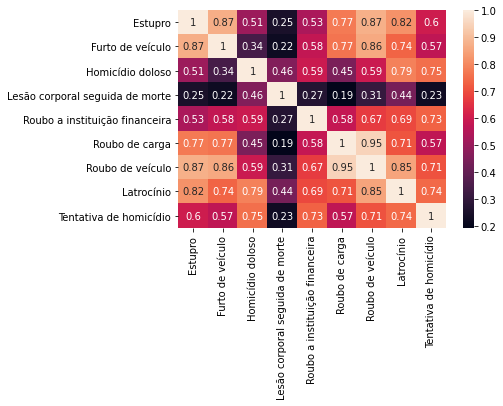

In [89]:
dataFrame_correlacao = dataFrame[['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio']].corr()
sns.heatmap(dataFrame_correlacao, xticklabels=['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio'], yticklabels=['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio'], annot=True)

É possível identificar algumas correlações, como:


*   Estupro e Furto de veículo;
*   Estupro e roubo de veículo;
*   Estupro e latrocínio;
*   Furto de veículo e roubo de veículo;
*   Furto de veículo e roubo de carga;
*   Latrocínio e homicídio doloso;








Será verificado o estado que mas possuí ocorrências

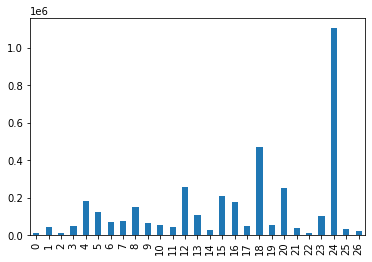

In [93]:
dataFrame['Ocorrências'].plot(kind='bar',x = 'UF',y = 'Ocorrências')

O gráfico informa que o estado com o maior número de ocorrências é o 24 que corresponde ao estado de São Paulo

# 4 - Clusterização

In [97]:
from sklearn import metrics

for k in range(2, 8):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(dataFrame[['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio']])
  score_mean = metrics.silhouette_score(dataFrame[['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio']], kmeans.labels_, metric='euclidean')
  print(k, score_mean)

2 0.8573320142629186
3 0.609567065605374
4 0.5431103589236272
5 0.5156915506034325
6 0.4943589064042876
7 0.3048043011569664


In [98]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataFrame[['Estupro','Furto de veículo','Homicídio doloso','Lesão corporal seguida de morte','Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Latrocínio','Tentativa de homicídio']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [155]:
clusters = kmeans.labels_.tolist()
clusters_dict = { 'uf': list(dataFrame.UF),  'cluster': clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['cluster','uf'])
dataframe_clusters

,cluster,uf
0,0,Acre
1,0,Alagoas
2,0,Amapá
3,0,Amazonas
4,0,Bahia
5,0,Ceará
6,0,Distrito Federal
7,0,Espírito Santo
8,0,Goiás
9,0,Maranhão
